<a href="https://colab.research.google.com/github/CarolinaFassi/MENTORIA/blob/main/Mento_TP1_con%20correcciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas de una Cadena de Supermercados

# Trabajo Práctico N°1: Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación a los datos bajo análisis. 
En este [link](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data), se describen los contenidos de cada uno de los archivos.
La información central se encuentra en el archivo *train.csv* porque que el mismo contiene las series históricas con las ventas de cada sucursal para cada familia de productos.
Entonces, en primer lugar se cargan y presentan brevemente los datos del archivo *train.csv* y luego se proponen las consignas a seguir para la resolución del trabajo práctico. 




### Carga del dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np


In [2]:
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df = pd.read_csv(url)

In [3]:
df

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

La variable de interés es *sales*. Si bien se podría trabajar con series desagregadas por sucursal y producto, se procede a agregar los datos a nivel de sucursales para reducir la carga computacional.

In [4]:
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr','date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

Guardado del dataset

In [5]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [6]:
df = pd.read_excel('dataset.xlsx')

In [7]:
df.index
#Consultamos la cantidad de registros en el dataframe

RangeIndex(start=0, stop=1684, step=1)

In [8]:
#Creamos un nuevo dataframe que contenga un registro por cada dia entre las fechas de inicio y finalización del dataframe original,
# luego le cargamos los datos del df original, de esta forma nos aseguramos que no se omitan días.
df.date = pd.to_datetime(df.date)
r = pd.date_range(start=df.date.min(), end=df.date.max())
df2 = df.set_index('date').reindex(r).fillna(0.0).rename_axis('date').reset_index()
df2.index
df2.set_index(df2['date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('date', 1)
df=df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [9]:
df.index
#El nuevo dataframe tiene 4 registros que no existian en el original.

RangeIndex(start=0, stop=1688, step=1)

In [10]:
df.set_index('date',inplace = True)

El nuevo dataframe tiene 4 días que faltaban en el dataframe original (Navidades).

# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análisis exploratorio profundo de las series.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los datos analizados que sirva de base para, en practicos posteriores, modelar las series y hacer pronósticos.

Dado que se trata de muchas series, se puede limitar el análisis a un subconjuto de las mismas, por ejemplo seleccionando las 5-10 sucursales con más ventas. 

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

Se proponen las siguientes actividades motivadoras:


- Determinar el tipo de variables y el período de tiempo bajo análisis.

- Explorar si hay valores faltantes.

- Indagar sobre la existencia de ceros. ¿Hay valores nulos? ¿Son muchos? ¿En qué días ocurren? 

- Analizar las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza, coeficiente de variación, coeficientes de asimetría y kurtosis).

- ¿Se mantienen inalteradas en el tiempo las distribuciones? En este caso se podría seleccionar una serie (o el total)  y graficar un boxplot para cada año.

- ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?

- Explorar la existencia de estacionalidad.

- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse?  

- ¿Las series tienden a moverse en forma conjunta? ¿Siempre se da dicho patrón?

- Seleccionar una serie y confeccionar un diagrama de dispersión entre la misma y su valor retardado un período. Repetir el mismo procedimiento entre la serie y sus valores retardados 2, 3 y 4 períodos.
 
- Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación.


## Fecha de entrega

- __Version final: 20/05__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


### **Tipo de variables y el período de tiempo bajo análisis:**

In [11]:
df.head(3)


Store 1       Store 2       Store 3      Store 4      Store 5  \
date                                                                            
2013-01-01     0.000000      0.000000      0.000000      0.00000      0.00000   
2013-01-02  7417.148000  10266.718981  24060.348000  10200.08398  10598.61902   
2013-01-03  5873.244001   7612.540000  18570.745025   7400.24500   7770.96800   

                 Store 6    Store 7    Store 8    Store 9    Store 10  ...  \
date                                                                   ...   
2013-01-01      0.000000      0.000      0.000      0.000     0.00000  ...   
2013-01-02  13520.485002  11997.502  14659.328  15867.484  5430.08800  ...   
2013-01-03   9929.393000   9277.958  10781.243  10431.719  4549.52998  ...   

               Store 45   Store 46     Store 47     Store 48   Store 49  \
date                                                                      
2013-01-01      0.00000      0.000      0.00000      0.00000      0.000   
2013-01-02  27612.05095  27149.920  27263.11101  19700.00000  16281.845   
2013-01-03  17377.98097  15751.355  18340.20500  14350.78403   9909.082   

               Store 50      Store 51  Store 52  Store 53  Store 54  
date                                                                 
2013-01-01      0.00000      0.000000       0.0       0.0     0.000  
2013-01-02  16576.13200  15134.490990       0.0       0.0  4973.285  
2013-01-03  11066.46504  11170.057015       0.0       0.0  3901.570  

[3 rows x 54 columns]

In [12]:
df.tail(3)

Store 1       Store 2       Store 3    Store 4     Store 5  \
date                                                                          
2017-08-13   3902.782000  13766.822095  34845.119300  13065.903  10044.8210   
2017-08-14  10433.314000  12211.461020  32843.704026  10911.890   9011.5749   
2017-08-15   9823.551018  11196.260002  30185.602000   9709.086   8703.6930   

                 Store 6      Store 7    Store 8    Store 9  Store 10  ...  \
date                                                                   ...   
2017-08-13  19261.918980  14871.92700  21646.660  18128.805  6773.542  ...   
2017-08-14  14206.605030  19957.60000  19140.137  15978.709  6236.741  ...   
2017-08-15  13849.208995  18744.29598  17723.876  18636.477  6806.592  ...   

             Store 45     Store 46   Store 47   Store 48      Store 49  \
date                                                                     
2017-08-13  46029.399  32935.39800  38953.744  29164.995  32984.485000   
2017-08-14  35065.714  23917.60600  31814.268  20146.347  31229.006000   
2017-08-15  31562.926  22348.41497  31653.691  17695.050  28429.226003   

                Store 50     Store 51   Store 52     Store 53      Store 54  
date                                                                         
2017-08-13  21221.233000  25713.28403  24232.105  12750.17602  14246.827996  
2017-08-14  18468.114000  18932.96700  18840.373   8530.74100  11882.994000  
2017-08-15  16879.121004  20154.55900  18600.046   8208.18900  12666.858000  

[3 rows x 54 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2013-01-01 to 2017-08-15
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store 1   1688 non-null   float64
 1   Store 2   1688 non-null   float64
 2   Store 3   1688 non-null   float64
 3   Store 4   1688 non-null   float64
 4   Store 5   1688 non-null   float64
 5   Store 6   1688 non-null   float64
 6   Store 7   1688 non-null   float64
 7   Store 8   1688 non-null   float64
 8   Store 9   1688 non-null   float64
 9   Store 10  1688 non-null   float64
 10  Store 11  1688 non-null   float64
 11  Store 12  1688 non-null   float64
 12  Store 13  1688 non-null   float64
 13  Store 14  1688 non-null   float64
 14  Store 15  1688 non-null   float64
 15  Store 16  1688 non-null   float64
 16  Store 17  1688 non-null   float64
 17  Store 18  1688 non-null   float64
 18  Store 19  1688 non-null   float64
 19  Store 20  1688 non-null   float64
 20  Store 21  16

El Data Frame incluye las ventas realizadas en las distintas tiendas a lo largo del periodo desde el 01-01-2013 hasta el 08-15-2017.
Las variables a analizar son continuas.

### **Exploracion de valores faltantes y existencia de ceros:**

In [14]:
df.describe()

Store 1        Store 2       Store 3       Store 4       Store 5  \
count   1688.000000    1688.000000   1688.000000   1688.000000   1688.000000   
mean    8379.746961   12770.964837  29906.344896  11202.429135   9237.206500   
std     3450.639607    5719.471599  11404.381601   4232.054922   2554.789113   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%     5594.019000    8975.251251  19997.550768   7816.046499   7454.556747   
50%     8410.797506   12570.614998  29490.778110  10941.030501   9133.575000   
75%    11072.022993   15350.252000  37238.023764  13448.780249  10656.044250   
max    21788.900000  136457.427000  69516.386030  26557.102000  22555.506000   

            Store 6       Store 7       Store 8       Store 9      Store 10  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean   14919.241704  15966.854018  18065.335858  15645.403474   5695.441787   
std     5684.036539   5764.350622   6806.435370   6028.696955   1716.161121   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%    10530.374500  10356.248008  12246.025754  11358.462250   4496.546150   
50%    14496.896000  17200.018000  17691.621499  14552.447500   5481.899005   
75%    17776.477500  20500.277325  22343.445225  18879.522251   6671.049250   
max    37344.259000  36744.413000  41095.617000  58939.425000  21348.774010   

       ...       Store 45      Store 46      Store 47      Store 48  \
count  ...    1688.000000   1688.000000   1688.000000   1688.000000   
mean   ...   32285.551195  24819.942015  30182.648140  21287.399451   
std    ...   13763.713806  11137.023535  12594.610539  10357.528358   
min    ...       0.000000      0.000000      0.000000      0.000000   
25%    ...   21896.529523  16811.355523  20541.751000  14009.271750   
50%    ...   30757.152900  22164.046989  28900.933000  18444.078495   
75%    ...   40204.478245  30490.544325  36780.434249  26731.625007   
max    ...  114144.378000  72375.146000  75297.955500  62877.964000   

           Store 49      Store 50      Store 51      Store 52      Store 53  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean   25722.805559  16974.538285  19497.327925   1597.256951   6644.648864   
std    11956.343271   6246.650535   6501.738433   5978.331065   5840.566684   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%    15068.437000  12372.796255  14135.690250      0.000000      0.000000   
50%    26120.388002  15984.746499  19155.392000      0.000000   6299.571995   
75%    34423.916750  20248.247750  24463.048750      0.000000  10310.896982   
max    65048.295000  43368.656000  41745.408956  35185.520970  29039.399000   

           Store 54  
count   1688.000000  
mean    6550.641658  
std     2799.991557  
min        0.000000  
25%     4468.355749  
50%     6140.906999  
75%     8018.918500  
max    25723.128000  

[8 rows x 54 columns]

Comenzamos por analizar los registros sin datos o con valor 0.

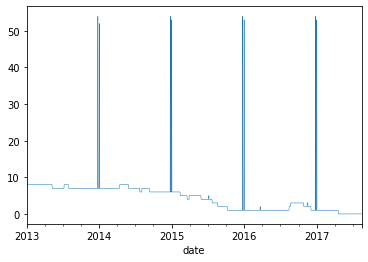

In [15]:
ceros=(df == 0).sum(axis=1)
ceros.plot(linewidth=0.5);
#ceros.describe()


In [16]:
#Añadimos una columna que sirva de contador que sume las tiendas con dato 0 en 
# cada registro.
df['SD'] = (df == 0).sum(axis=1)
df[df['SD']>50] #Lista de días con más de 50 tiendas cerradas.


Store 1  Store 2  Store 3  Store 4  Store 5  Store 6  Store 7  \
date                                                                        
2013-01-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2013-12-25      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2014-01-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2014-12-25      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2015-01-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2015-12-25      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2016-01-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2016-12-25      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2017-01-01      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

            Store 8  Store 9  Store 10  ...  Store 46  Store 47  Store 48  \
date                                    ...                                 
2013-01-01      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2013-12-25      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2014-01-01      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2014-12-25      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2015-01-01      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2015-12-25      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2016-01-01      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2016-12-25      0.0      0.0       0.0  ...       0.0       0.0       0.0   
2017-01-01      0.0      0.0       0.0  ...       0.0       0.0       0.0   

            Store 49  Store 50  Store 51  Store 52  Store 53  Store 54  SD  
date                                                                        
2013-01-01       0.0       0.0       0.0       0.0       0.0       0.0  53  
2013-12-25       0.0       0.0       0.0       0.0       0.0       0.0  54  
2014-01-01       0.0       0.0       0.0       0.0       0.0       0.0  52  
2014-12-25       0.0       0.0       0.0       0.0       0.0       0.0  54  
2015-01-01       0.0       0.0       0.0       0.0       0.0       0.0  53  
2015-12-25       0.0       0.0       0.0       0.0       0.0       0.0  54  
2016-01-01       0.0       0.0       0.0       0.0       0.0       0.0  53  
2016-12-25       0.0       0.0       0.0       0.0       0.0       0.0  54  
2017-01-01       0.0       0.0       0.0       0.0       0.0       0.0  53  

[9 rows x 55 columns]

Los dias que las tiendas permanecen cerradas corresponden a los 01 de enero y 25 de diciembre de cada año. Vamos a imputar estos valores ya que son faltantes en comun en todas las columnas y nos interesa mantener continuidad en la serie.

En este sentido consideramos que era conveniente imputar con el valor siguiente
 de la serie, en lugar de interpolar o usar el valor anterior, ya que se trata de días posteriores a fiestas de Navidad y Año Nuevo, por lo que los dias anteriores a estas festividades no serán datos normales, esta opcion es la que que menos impacta en los datos.

En esta primera aproximación no consideramos constantes los montos netos, si hicieramos un analisis más estricto donde debieramos respetar por ejemplo la contabilidad de la empresa, considerariamos restar estos valores agregados de forma proporcional a todos los días del més en cuestion. 

In [17]:
df.loc[df['SD']>50] = np.nan
df

Store 1       Store 2       Store 3       Store 4  \
date                                                                 
2013-01-01           NaN           NaN           NaN           NaN   
2013-01-02   7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-03   5873.244001   7612.540000  18570.745025   7400.245000   
2013-01-04   5919.879001   7526.377000  17392.097995   6902.050001   
2013-01-05   6318.785010   9539.566000  22700.872005   9948.383000   
...                  ...           ...           ...           ...   
2017-08-11   5403.742021  13081.771001  32885.759996  10819.543000   
2017-08-12   7543.623000  12382.416000  31903.476000  10622.300000   
2017-08-13   3902.782000  13766.822095  34845.119300  13065.903000   
2017-08-14  10433.314000  12211.461020  32843.704026  10911.890000   
2017-08-15   9823.551018  11196.260002  30185.602000   9709.086000   

                 Store 5       Store 6       Store 7      Store 8  \
date                                                                
2013-01-01           NaN           NaN           NaN          NaN   
2013-01-02  10598.619020  13520.485002  11997.502000  14659.32800   
2013-01-03   7770.968000   9929.393000   9277.958000  10781.24300   
2013-01-04   7347.641991   8869.211980   8096.573018  11124.65100   
2013-01-05   8192.598000  12431.689040   8610.605999  14277.69902   
...                  ...           ...           ...          ...   
2017-08-11   9510.871000  15775.922000  15090.052970  18440.07100   
2017-08-12   8157.070000  14502.508000  14668.772022  19548.54801   
2017-08-13  10044.821000  19261.918980  14871.927000  21646.66000   
2017-08-14   9011.574900  14206.605030  19957.600000  19140.13700   
2017-08-15   8703.693000  13849.208995  18744.295980  17723.87600   

                 Store 9    Store 10  ...     Store 46      Store 47  \
date                                  ...                              
2013-01-01           NaN         NaN  ...          NaN           NaN   
2013-01-02  15867.484000  5430.08800  ...  27149.92000  27263.111010   
2013-01-03  10431.719000  4549.52998  ...  15751.35500  18340.205000   
2013-01-04   8085.159000  3381.01600  ...  17073.06408  18982.008970   
2013-01-05  13057.110000  5409.78501  ...  27231.19803  26996.263995   
...                  ...         ...  ...          ...           ...   
2017-08-11  15569.746000  5932.17900  ...  32020.67400  38072.657020   
2017-08-12  16901.506991  6322.80800  ...  28639.05300  34385.410000   
2017-08-13  18128.805000  6773.54200  ...  32935.39800  38953.744000   
2017-08-14  15978.709000  6236.74100  ...  23917.60600  31814.268000   
2017-08-15  18636.477000  6806.59200  ...  22348.41497  31653.691000   

                Store 48      Store 49      Store 50      Store 51   Store 52  \
date                                                                            
2013-01-01           NaN           NaN           NaN           NaN        NaN   
2013-01-02  19700.000000  16281.845000  16576.132000  15134.490990      0.000   
2013-01-03  14350.784030   9909.082000  11066.465040  11170.057015      0.000   
2013-01-04  15276.803001  10284.566000  12147.440000  12452.326000      0.000   
2013-01-05  22876.474000  13506.025000  17930.364000  15046.247000      0.000   
...                  ...           ...           ...           ...        ...   
2017-08-11  26365.391000  32977.570000  21339.243004  26070.018000  30742.706   
2017-08-12  24749.852000  30722.046040  19413.958001  19532.964000  22525.366   
2017-08-13  29164.995000  32984.485000  21221.233000  25713.284030  24232.105   
2017-08-14  20146.347000  31229.006000  18468.114000  18932.967000  18840.373   
2017-08-15  17695.050000  28429.226003  16879.121004  20154.559000  18600.046   

               Store 53      Store 54   SD  
date                                        
2013-01-01          NaN           NaN  NaN  
2013-01-02      0.00000   4973.285000  8.0  
2013-01-03      0.00000   3901.570000

In [18]:
df_completo=df.bfill(axis = 0)
df_completo


Store 1       Store 2       Store 3       Store 4  \
date                                                                 
2013-01-01   7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-02   7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-03   5873.244001   7612.540000  18570.745025   7400.245000   
2013-01-04   5919.879001   7526.377000  17392.097995   6902.050001   
2013-01-05   6318.785010   9539.566000  22700.872005   9948.383000   
...                  ...           ...           ...           ...   
2017-08-11   5403.742021  13081.771001  32885.759996  10819.543000   
2017-08-12   7543.623000  12382.416000  31903.476000  10622.300000   
2017-08-13   3902.782000  13766.822095  34845.119300  13065.903000   
2017-08-14  10433.314000  12211.461020  32843.704026  10911.890000   
2017-08-15   9823.551018  11196.260002  30185.602000   9709.086000   

                 Store 5       Store 6       Store 7      Store 8  \
date                                                                
2013-01-01  10598.619020  13520.485002  11997.502000  14659.32800   
2013-01-02  10598.619020  13520.485002  11997.502000  14659.32800   
2013-01-03   7770.968000   9929.393000   9277.958000  10781.24300   
2013-01-04   7347.641991   8869.211980   8096.573018  11124.65100   
2013-01-05   8192.598000  12431.689040   8610.605999  14277.69902   
...                  ...           ...           ...          ...   
2017-08-11   9510.871000  15775.922000  15090.052970  18440.07100   
2017-08-12   8157.070000  14502.508000  14668.772022  19548.54801   
2017-08-13  10044.821000  19261.918980  14871.927000  21646.66000   
2017-08-14   9011.574900  14206.605030  19957.600000  19140.13700   
2017-08-15   8703.693000  13849.208995  18744.295980  17723.87600   

                 Store 9    Store 10  ...     Store 46      Store 47  \
date                                  ...                              
2013-01-01  15867.484000  5430.08800  ...  27149.92000  27263.111010   
2013-01-02  15867.484000  5430.08800  ...  27149.92000  27263.111010   
2013-01-03  10431.719000  4549.52998  ...  15751.35500  18340.205000   
2013-01-04   8085.159000  3381.01600  ...  17073.06408  18982.008970   
2013-01-05  13057.110000  5409.78501  ...  27231.19803  26996.263995   
...                  ...         ...  ...          ...           ...   
2017-08-11  15569.746000  5932.17900  ...  32020.67400  38072.657020   
2017-08-12  16901.506991  6322.80800  ...  28639.05300  34385.410000   
2017-08-13  18128.805000  6773.54200  ...  32935.39800  38953.744000   
2017-08-14  15978.709000  6236.74100  ...  23917.60600  31814.268000   
2017-08-15  18636.477000  6806.59200  ...  22348.41497  31653.691000   

                Store 48      Store 49      Store 50      Store 51   Store 52  \
date                                                                            
2013-01-01  19700.000000  16281.845000  16576.132000  15134.490990      0.000   
2013-01-02  19700.000000  16281.845000  16576.132000  15134.490990      0.000   
2013-01-03  14350.784030   9909.082000  11066.465040  11170.057015      0.000   
2013-01-04  15276.803001  10284.566000  12147.440000  12452.326000      0.000   
2013-01-05  22876.474000  13506.025000  17930.364000  15046.247000      0.000   
...                  ...           ...           ...           ...        ...   
2017-08-11  26365.391000  32977.570000  21339.243004  26070.018000  30742.706   
2017-08-12  24749.852000  30722.046040  19413.958001  19532.964000  22525.366   
2017-08-13  29164.995000  32984.485000  21221.233000  25713.284030  24232.105   
2017-08-14  20146.347000  31229.006000  18468.114000  18932.967000  18840.373   
2017-08-15  17695.050000  28429.226003  16879.121004  20154.559000  18600.046   

               Store 53      Store 54   SD  
date                                        
2013-01-01      0.00000   4973.285000  8.0  
2013-01-02      0.00000   4973.285000  8.0  
2013-01-03      0.00000   3901.570000

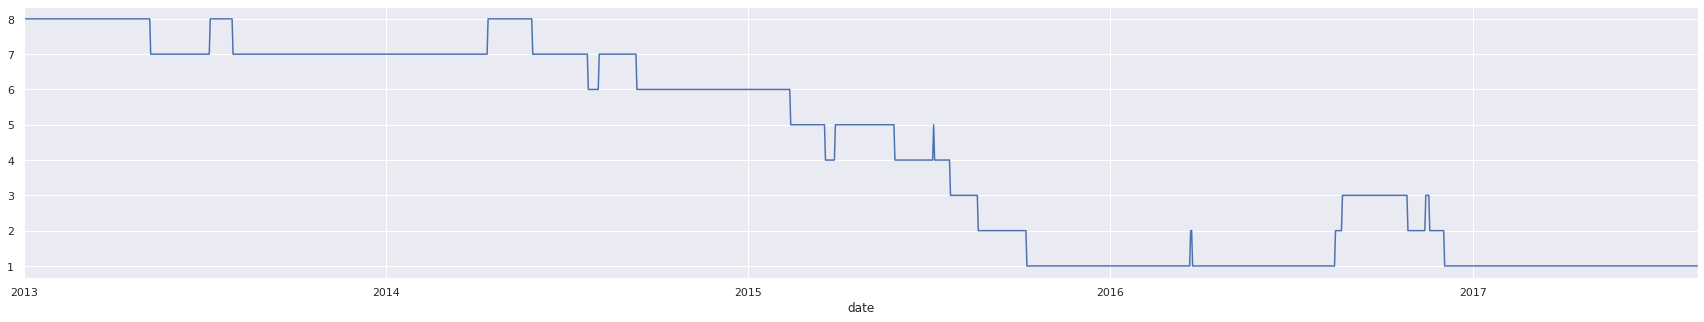

In [19]:
# Analizamos ahora el resto de los días donde solo algunas de las tiendas estan cerradas. 
sns.set(rc={'figure.figsize':(30, 5)})
ceros=(df_completo == 0).sum(axis=1)
ceros.plot();
#ceros.describe()

In [20]:
pd.options.display.max_columns = None
df_completo.describe()

Store 1        Store 2       Store 3       Store 4       Store 5  \
count   1688.000000    1688.000000   1688.000000   1688.000000   1688.000000   
mean    8419.043691   12850.164671  30109.640166  11275.663218   9304.509735   
std     3401.238761    5653.693440  11243.406315   4167.794677   2480.939938   
min        0.000000    4872.602998  11454.688000   4038.048000   3938.656000   
25%     5616.249502    9010.865250  20214.349260   7935.073001   7500.327250   
50%     8490.503500   12584.444400  29626.886020  10961.168450   9164.242500   
75%    11076.488499   15369.571750  37397.527175  13473.940250  10699.129000   
max    21788.900000  136457.427000  69516.386030  26557.102000  22555.506000   

            Store 6       Store 7       Store 8       Store 9      Store 10  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean   15025.367975  16059.202186  18184.586923  15761.949881   5740.825841   
std     5607.453563   5660.831587   6703.961514   5960.525636   1682.712996   
min     5753.537000   4781.043010   7525.230000   5777.136000   2084.932000   
25%    10622.200250  10436.750520  12328.599250  11423.524250   4512.925500   
50%    14553.145501  17273.885012  17743.540500  14626.989525   5497.158505   
75%    17840.595008  20514.894748  22416.806750  19003.429834   6701.566000   
max    37344.259000  36744.413000  41095.617000  58939.425000  21348.774010   

           Store 11      Store 12      Store 13      Store 14      Store 15  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean   16907.915173   6359.755342   6281.700217   6798.143054   6827.847055   
std     4995.995115   2189.793677   2013.803612   2268.688755   1792.790029   
min     7330.076000      0.000000   2724.931000      0.000000   2484.305000   
25%    13288.148250   5048.135500   4792.759497   5335.012250   5369.755500   
50%    16215.962000   6405.080495   5989.996505   6563.772350   6844.867500   
75%    19734.553503   7665.313503   7373.825254   7931.510250   8045.780500   
max    39085.735000  20826.648000  16745.100010  16445.920004  17315.300000   

           Store 16      Store 17      Store 18      Store 19       Store 20  \
count   1688.000000   1688.000000   1688.000000   1688.000000    1688.000000   
mean    6552.998988  10754.032831   7907.694876   7790.653900    7711.523880   
std     2028.257312   4429.900796   3935.746364   2818.673931    8795.892934   
min      802.107000      0.000000      0.000000   2852.533010       0.000000   
25%     5097.186500   7295.432250   5362.025508   5794.396844       0.000000   
50%     6184.144499  10144.562501   7644.424455   7412.260499    7937.253496   
75%     7567.429746  13533.001250   9941.160250   9101.283754   12828.175999   
max    16480.830999  29398.391000  29701.359000  20718.453000  117725.098000   

           Store 21      Store 22      Store 23      Store 24      Store 25  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean    5527.573601   2441.964830   6950.540089  14163.765380   6839.544041   
std     6794.464695   3177.368382   1770.422685   5792.433590   4862.883189   
min        0.000000      0.000000   3165.415000      0.000000      0.000000   
25%        0.000000      0.000000   5442.172075  10529.121007   4194.465004   
50%        0.000000      0.000000   7035.123500  14714.424502   5796.860495   
75%    10799.262500   5365.331500   8108.953000  18074.894250   7969.503025   
max    33689.363980  21571.010010  14079.289000  54672.039970  39140.266900   

           Store 26      Store 27      Store 28      Store 29      Store 30  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean    4630.565325  11439.518310  10958.045970   5791.248594   4395.139308   
std     2408.609740   4676.384961   5087.824532   6111.070447   1613.500661   
min     1904.157000   2719.784000   2568.746006      0.000000      0.000000   
25%     3285.589250   7645.450001   724

Eliminacion de todas las tiendas que estan cerradas por largos periodos de tiempo (es posible que se trate de refacciones o innauguraciones posteriores).

---



In [21]:
df_completo=df_completo.drop(['Store 1', 'Store 12', 'Store 14', 'Store 17', 'Store 18', 'Store 20', 'Store 21', 'Store 22', 'Store 24', 'Store 25', 'Store 29', 'Store 30', 'Store 36', 'Store 42', 'Store 43', 'Store 52', 'Store 53'], axis=1)
df_completo=df_completo.drop(['SD'], axis=1)

In [22]:
sns.set(rc={'figure.figsize':(30, 5)})
ceros=(df_completo == 0).sum(axis=1)
ceros.plot();

El resultado es un dataframe sin ningún dato faltante. 

###**Analisis de distribuciones - Estadística Descriptiva:**



In [23]:
df_completo.describe()

Store 2       Store 3       Store 4       Store 5       Store 6  \
count    1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean    12850.164671  30109.640166  11275.663218   9304.509735  15025.367975   
std      5653.693440  11243.406315   4167.794677   2480.939938   5607.453563   
min      4872.602998  11454.688000   4038.048000   3938.656000   5753.537000   
25%      9010.865250  20214.349260   7935.073001   7500.327250  10622.200250   
50%     12584.444400  29626.886020  10961.168450   9164.242500  14553.145501   
75%     15369.571750  37397.527175  13473.940250  10699.129000  17840.595008   
max    136457.427000  69516.386030  26557.102000  22555.506000  37344.259000   

            Store 7       Store 8       Store 9      Store 10      Store 11  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean   16059.202186  18184.586923  15761.949881   5740.825841  16907.915173   
std     5660.831587   6703.961514   5960.525636   1682.712996   4995.995115   
min     4781.043010   7525.230000   5777.136000   2084.932000   7330.076000   
25%    10436.750520  12328.599250  11423.524250   4512.925500  13288.148250   
50%    17273.885012  17743.540500  14626.989525   5497.158505  16215.962000   
75%    20514.894748  22416.806750  19003.429834   6701.566000  19734.553503   
max    36744.413000  41095.617000  58939.425000  21348.774010  39085.735000   

           Store 13      Store 15      Store 16      Store 19      Store 23  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean    6281.700217   6827.847055   6552.998988   7790.653900   6950.540089   
std     2013.803612   1792.790029   2028.257312   2818.673931   1770.422685   
min     2724.931000   2484.305000    802.107000   2852.533010   3165.415000   
25%     4792.759497   5369.755500   5097.186500   5794.396844   5442.172075   
50%     5989.996505   6844.867500   6184.144499   7412.260499   7035.123500   
75%     7373.825254   8045.780500   7567.429746   9101.283754   8108.953000   
max    16745.100010  17315.300000  16480.830999  20718.453000  14079.289000   

           Store 26      Store 27      Store 28      Store 31      Store 32  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean    4630.565325  11439.518310  10958.045970  10594.437680   3545.395192   
std     2408.609740   4676.384961   5087.824532   4250.494130   1506.363270   
min     1904.157000   2719.784000   2568.746006   2621.893998   1451.785000   
25%     3285.589250   7645.450001   7247.050497   7493.578000   2669.994000   
50%     4131.814499  11149.232012  10180.775995  10057.602500   3282.252499   
75%     5339.056005  14238.054015  13796.884000  12832.049750   4051.109996   
max    43563.033000  40102.023010  36743.614005  52419.514000  25127.471000   

           Store 33      Store 34      Store 35      Store 37      Store 38  \
count   1688.000000   1688.000000   1688.000000   1688.000000   1688.000000   
mean    8454.135418  10194.317207   4585.003640  11909.292715  11260.007772   
std     2829.653061   2567.893236   2351.694795   3465.550514   4110.471975   
min     2517.503000   4128.756000   1305.277000   2676.580001   4102.126005   
25%     6334.582742   8355.063002   3233.987750   8985.937749   8081.313500   
50%     8047.764000  10022.703500   4435.066002  12141.299996  10616.818995   
75%    10248.884265  11717.290500   5598.558300  14315.587750  13654.510499   
max    22169.688980  29824.028000  50977.860990  24581.945001  26825.178000   

            Store 39      Store 40      Store 41      Store 44       Store 45  \
count    1688.000000   1688.000000   1688.000000   1688.000000    1688.000000   
mean    12083.958474  10963.798378   8941.304572  37034.850792   32544.568445   
std      5093.580707   4329.695862   3926.554827  14621.504114   13673.921707   
min      3228.597000   2274.261000   2592.269000   9067.748000    2741.897999   
25%      8321.448502   7397.592250   58

Rolling para 7, 28 y 365 dias

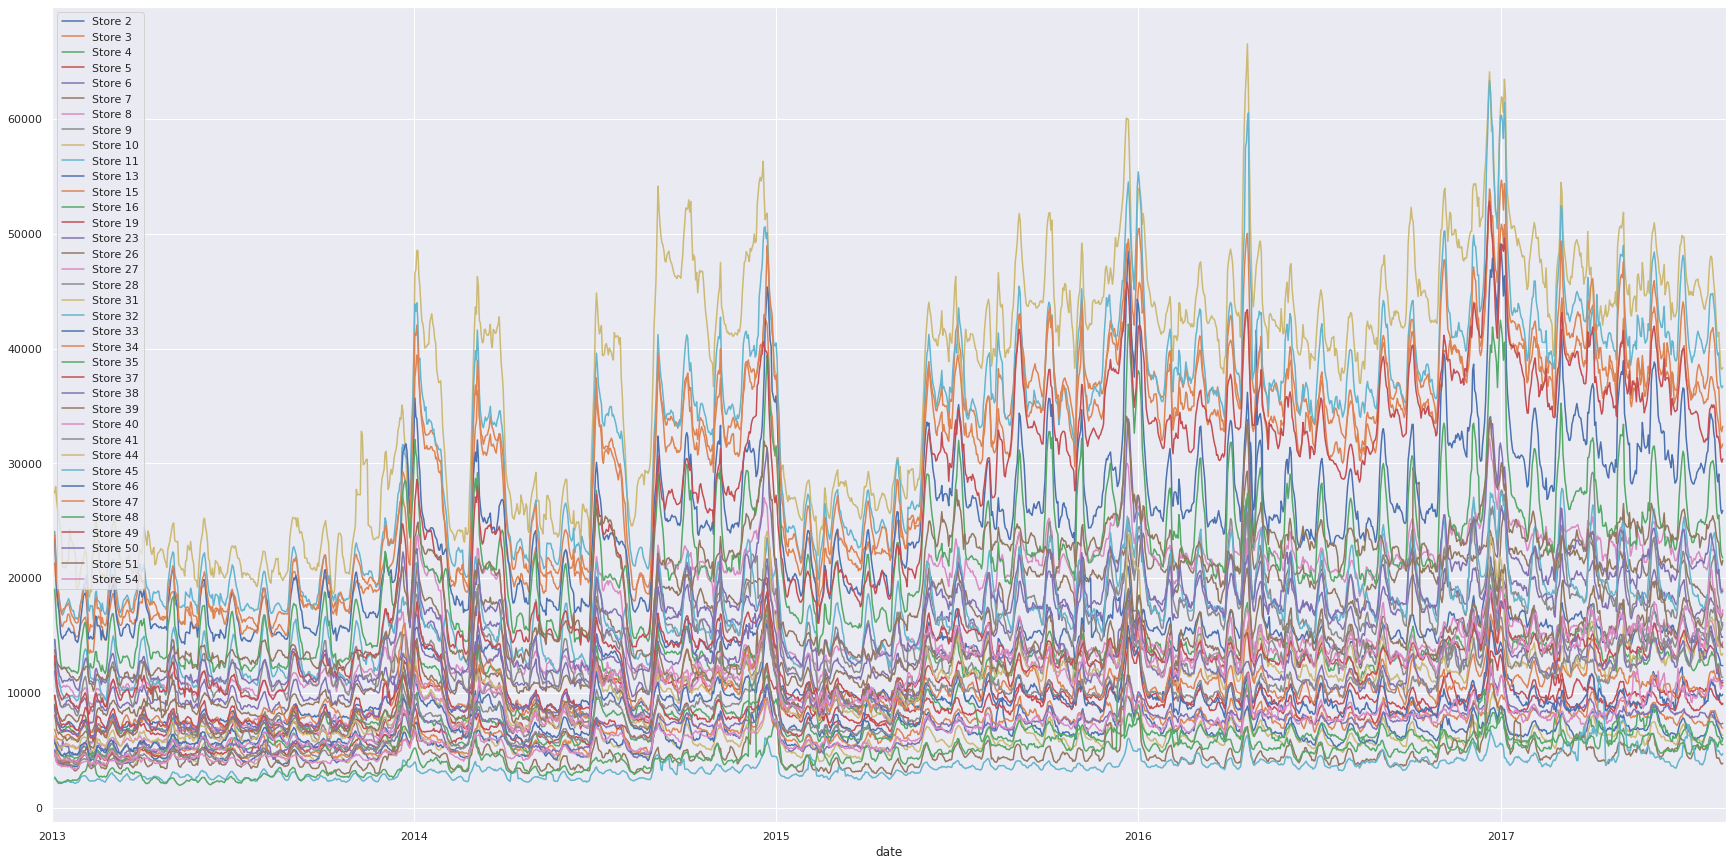

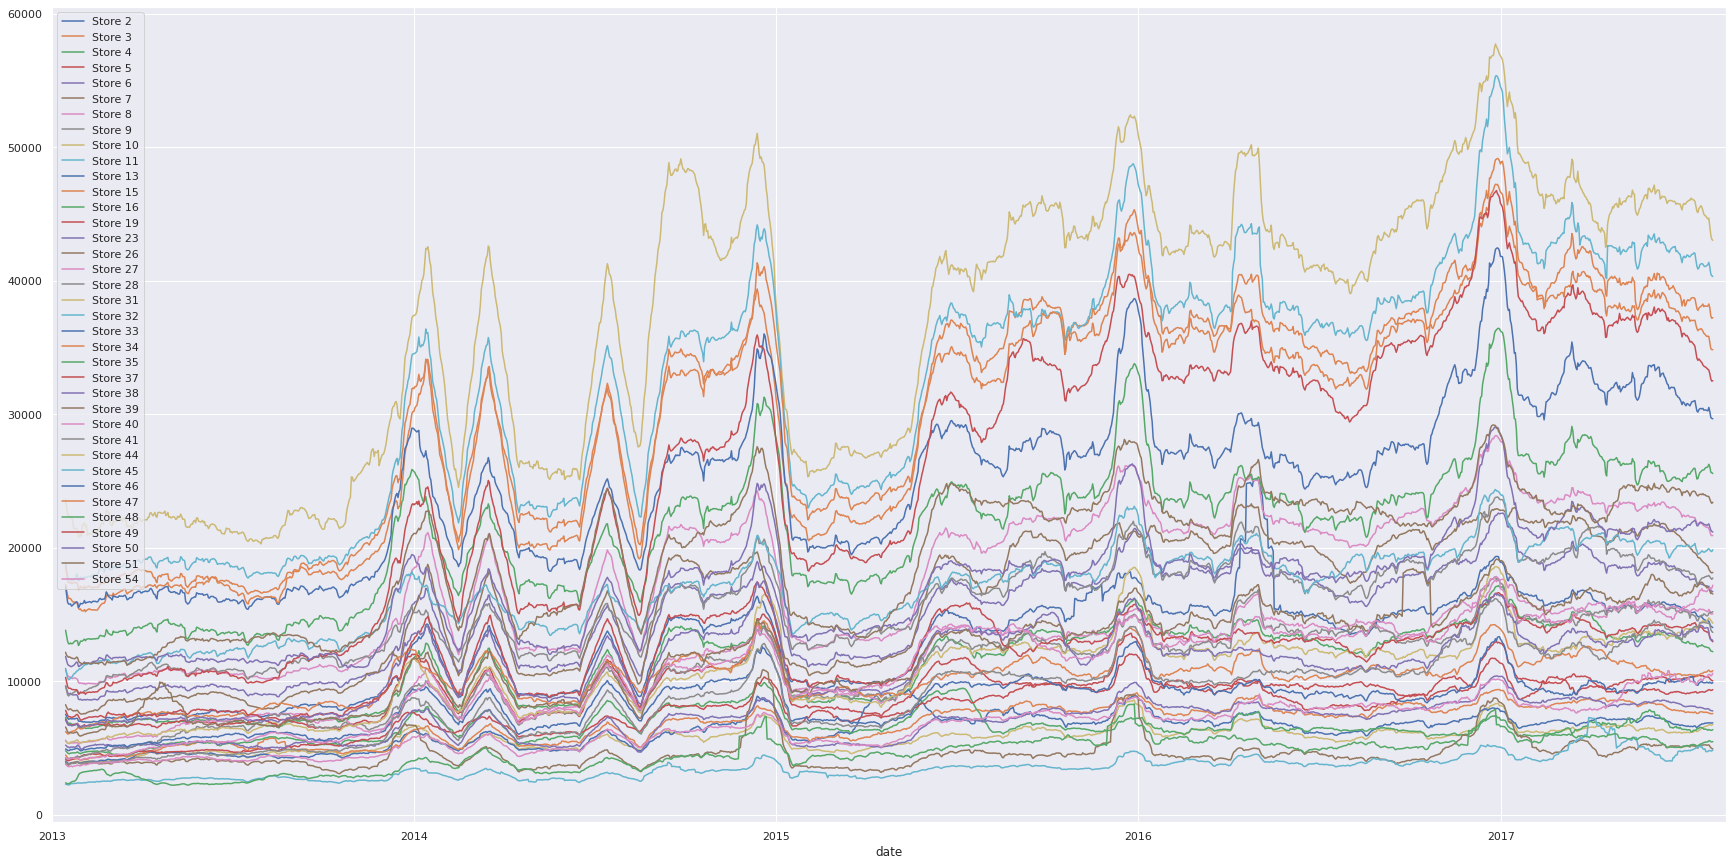

In [24]:
sns.set(rc={'figure.figsize':(30, 15)})
df_completo.rolling(7, center=True).mean().plot()
df_completo.rolling(28, center=True).mean().plot()
df_completo.rolling(365, center=True).mean().plot()
plt.show()

In [25]:
#Resampling
df_completo_meanW = df_completo.resample('W').mean()
df_completo_meanM = df_completo.resample('M').mean()
#df_completo_meanY = df_completo.resample('3M').mean()
#df_completo_meanW.plot()
df_completo_meanM.plot()
#df_completo_meanY.plot()
plt.show()

In [26]:
#df.sort_values(by='country',ascending=False).plot.bar()
df_completo.mean().sort_values(ascending=False).plot.bar()
plt.show()

In [27]:
df_completo.mean().describe()

count       37.000000
mean     14079.637602
std       8524.900962
min       3545.395192
25%       7790.653900
50%      11275.663218
75%      17117.995956
max      37034.850792
dtype: float64

Se presenta bastante dispersion en los montos de ventas de las sucursales, sin embargo en las graficas individuales casi todas tienen el mismo comportamiento.
Además, en los Rolling se observa que las lineas de tiendas diferentes rara vez se cortan, por lo tanto se podrian agrupar en 3 grandes segmentos. 

# Tendencia

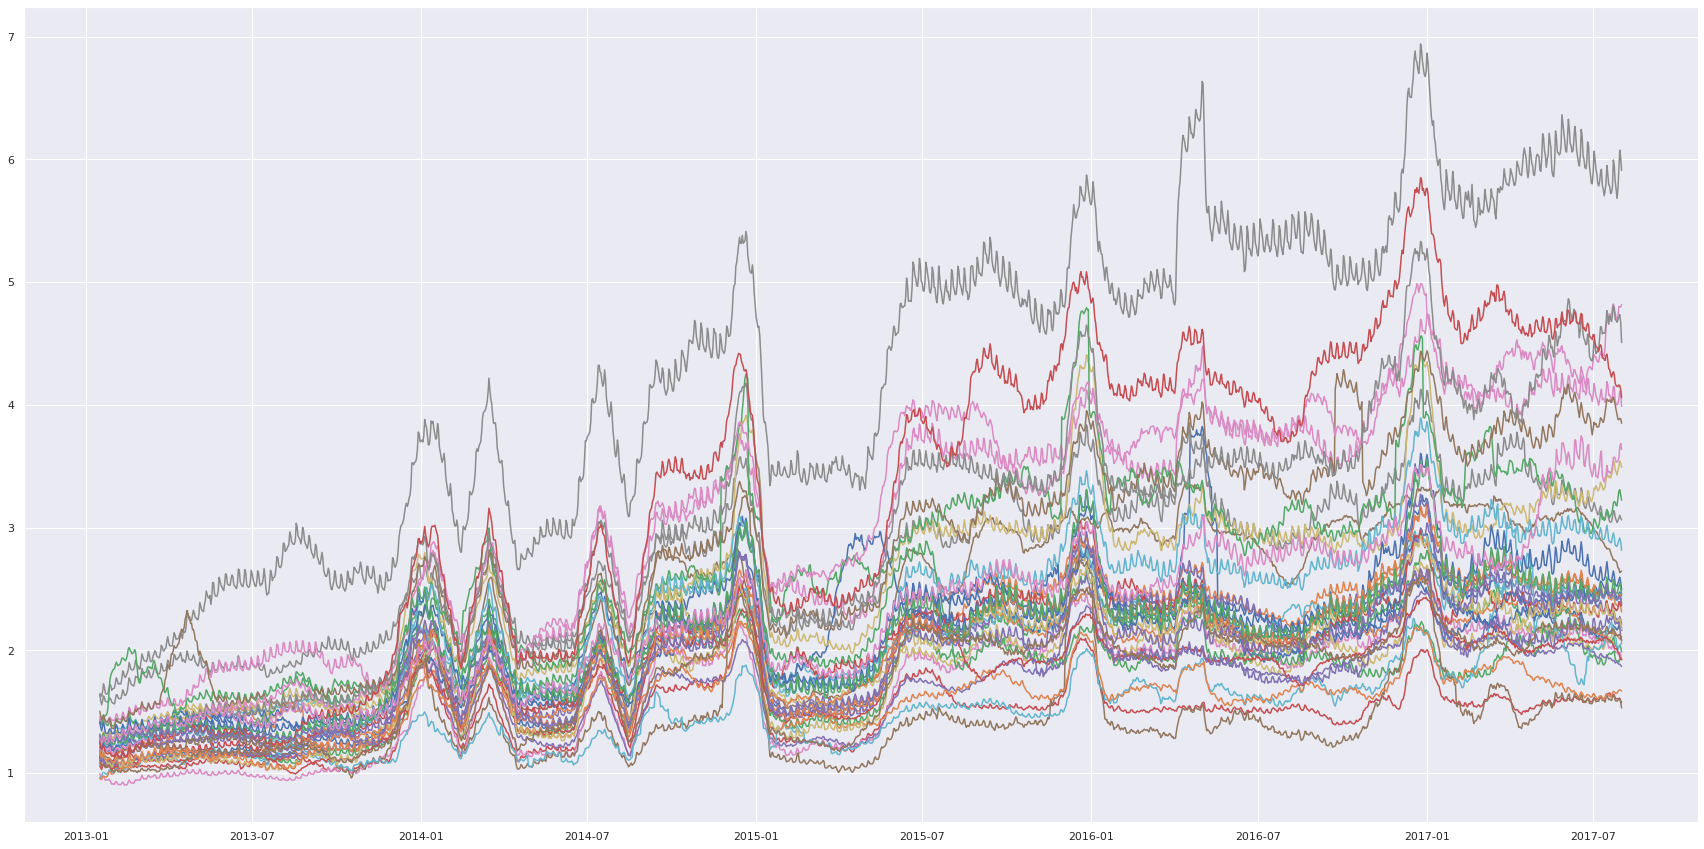

Store 2   Store 3   Store 4   Store 5   Store 6   Store 7  \
date                                                                     
2013-01-01  1.589328  1.604287  1.669520  1.661233  1.798728  1.739439   
2013-01-02  1.589328  1.604287  1.669520  1.661233  1.798728  1.739439   
2013-01-03  1.178451  1.238253  1.211251  1.218025  1.320979  1.345150   
2013-01-04  1.165113  1.159664  1.129708  1.151673  1.179936  1.173869   
2013-01-05  1.476762  1.513641  1.628323  1.284112  1.653878  1.248395   
2013-01-06  1.597946  1.689853  1.911698  1.699573  2.199580  1.271600   
2013-01-07  1.033466  1.135937  1.104525  1.013848  1.119479  1.384796   
2013-01-08  0.945785  0.948184  0.984946  1.007506  1.039864  1.189002   
2013-01-09  1.043458  0.982505  0.960438  0.949394  1.054184  1.053829   
2013-01-10  0.861489  0.814995  0.765067  0.932733  0.797114  1.045348   

             Store 8   Store 9  Store 10  Store 11  Store 13  Store 15  \
date                                                                     
2013-01-01  1.360165  2.746600  1.783501  2.242613  1.763572  1.825860   
2013-01-02  1.360165  2.746600  1.783501  2.242613  1.763572  1.825860   
2013-01-03  1.000337  1.805690  1.494284  1.511769  1.551185  1.579825   
2013-01-04  1.032200  1.399510  1.110488  1.489232  1.358437  1.339498   
2013-01-05  1.324755  2.260135  1.776832  1.806244  2.066748  1.580549   
2013-01-06  1.338466  2.758552  1.879396  1.925684  1.455109  1.450347   
2013-01-07  0.905160  1.549409  1.366989  1.333944  1.282829  1.366772   
2013-01-08  0.768405  1.615840  1.220548  1.245768  1.244060  1.235314   
2013-01-09  0.905494  1.245141  1.021078  1.150792  1.114190  0.993778   
2013-01-10  0.801901  1.241732  1.014118  1.165283  1.043042  1.142753   

            Store 16  Store 19  Store 23  Store 26  Store 27  Store 28  \
date                                                                     
2013-01-01  1.886084  1.426549  1.574192  1.754577  1.915304  2.015175   
2013-01-02  1.886084  1.426549  1.574192  1.754577  1.915304  2.015175   
2013-01-03  1.606262  0.961066  1.178473  1.079285  1.165934  1.612578   
2013-01-04  1.394943  0.821448  1.348679  1.098183  1.218789  1.018258   
2013-01-05  1.817223  1.616682  1.449574  1.707953  1.788830  2.312269   
2013-01-06  2.279167  1.095782  1.255364  1.733124  2.256494  2.906934   
2013-01-07  1.458213  0.980150  1.649875  1.041581  1.284175  1.426976   
2013-01-08  1.384583  1.147539  1.015467  0.981184  1.215882  1.489489   
2013-01-09  1.315585  0.863121  1.777545  0.993498  1.209424  1.025724   
2013-01-10  1.056646  0.837134  0.970621  1.104952  1.087185  1.106788   

            Store 31  Store 32  Store 33  Store 34  Store 35  Store 37  \
date                                                                     
2013-01-01  1.594581  1.040124  1.415977  1.201066  1.758634  1.635249   
2013-01-02  1.594581  1.040124  1.415977  1.201066  1.758634  1.635249   
2013-01-03  1.306361  1.103256  1.279010  0.968132  1.593917  1.373862   
2013-01-04  1.467274  1.152590  1.059887  0.945411  1.421283  1.317768   
2013-01-05  1.411432  1.117718  1.480579  1.114232  1.760487  1.658240   
2013-01-06  1.911624  1.119039  1.852542  1.044419  1.467475  1.366881   
2013-01-07  1.228117  0.996103  1.324202  0.940318  1.236801  1.113942   
2013-01-08  1.158706  0.844986  1.159490  0.855457  1.248087  1.036207   
2013-01-09  0.924225  0.754816  1.005643  0.831428  1.076922  1.222194   
2013-01-10  0.974457  0.871369  0.795134  0.728334  0.957534  0.898480   

            Store 38  Store 39  Store 40  Store 41  Store 44  Store 45  \
date                                                                     
2013-01-01  1.480913  2.312998  1.402486  1.725253  1.524696  1.942951   
2013-01-02  1.480913  2.312998  1.402486  1.725253  1.524696  1.942951   
2013-01-03  1.265519  1.623045  1.266846  1.225916  1.035899  1.222820   
2013-01-04  1.196800  1.302232  1.084142  1.186815  1.154892  1.402831   
2013-01-05  1

In [28]:
#Grafico por indices tomando como 1 el 10/1/2013
df_indice=df_completo/df_completo.iloc[10]

#i=df_indice.rolling(30, center=True).sum()
i=df_indice.rolling(30, center=True).mean()
#deberia usar la media geometrica

plt.plot(i)
plt.show()
df_indice.head(10)


Tanto en las graficas de promedios como en las graficas de indices, se observan tendencias crecientes en el largo plazo, los periodos de caida abrupta en el periodo 2014 - 2015, que se extienden por varios meses pueden deberse a la caida en el precio del petroleo, (principal bien de exportación del pais, que representa casi el 80% de su balanza comercial) este desarreglo macroeconomico sostenido en el tiempo llevo a que el gobierno impusiera limitaciones a las importaciones para disminuir el deficit comercial, lo que impacta en la industria y la producción de todo tipo de bienes.

Para la agrupacion en 3 segmentos el criterio es considerar "**Grandes**" las tiendas correspondientes al cuartil superior, "**Pequeñas**" a las tiendas del primer cuartil y "**Medianas**" a las tiendas de los dos cuartiles intermedios. 

In [29]:
dfp_l=df_completo[df_completo.columns[df_completo.mean()<df_completo.mean().quantile(26/100)]]

dfm_l=df_completo[df_completo.columns[df_completo.mean()<df_completo.mean().quantile(74/100)]]
dfm_l=dfm_l[dfm_l.columns[dfm_l.mean()>dfm_l.mean().quantile(25/100)]]

dfg_l=df_completo[df_completo.columns[df_completo.mean()>df_completo.mean().quantile(75/100)]]



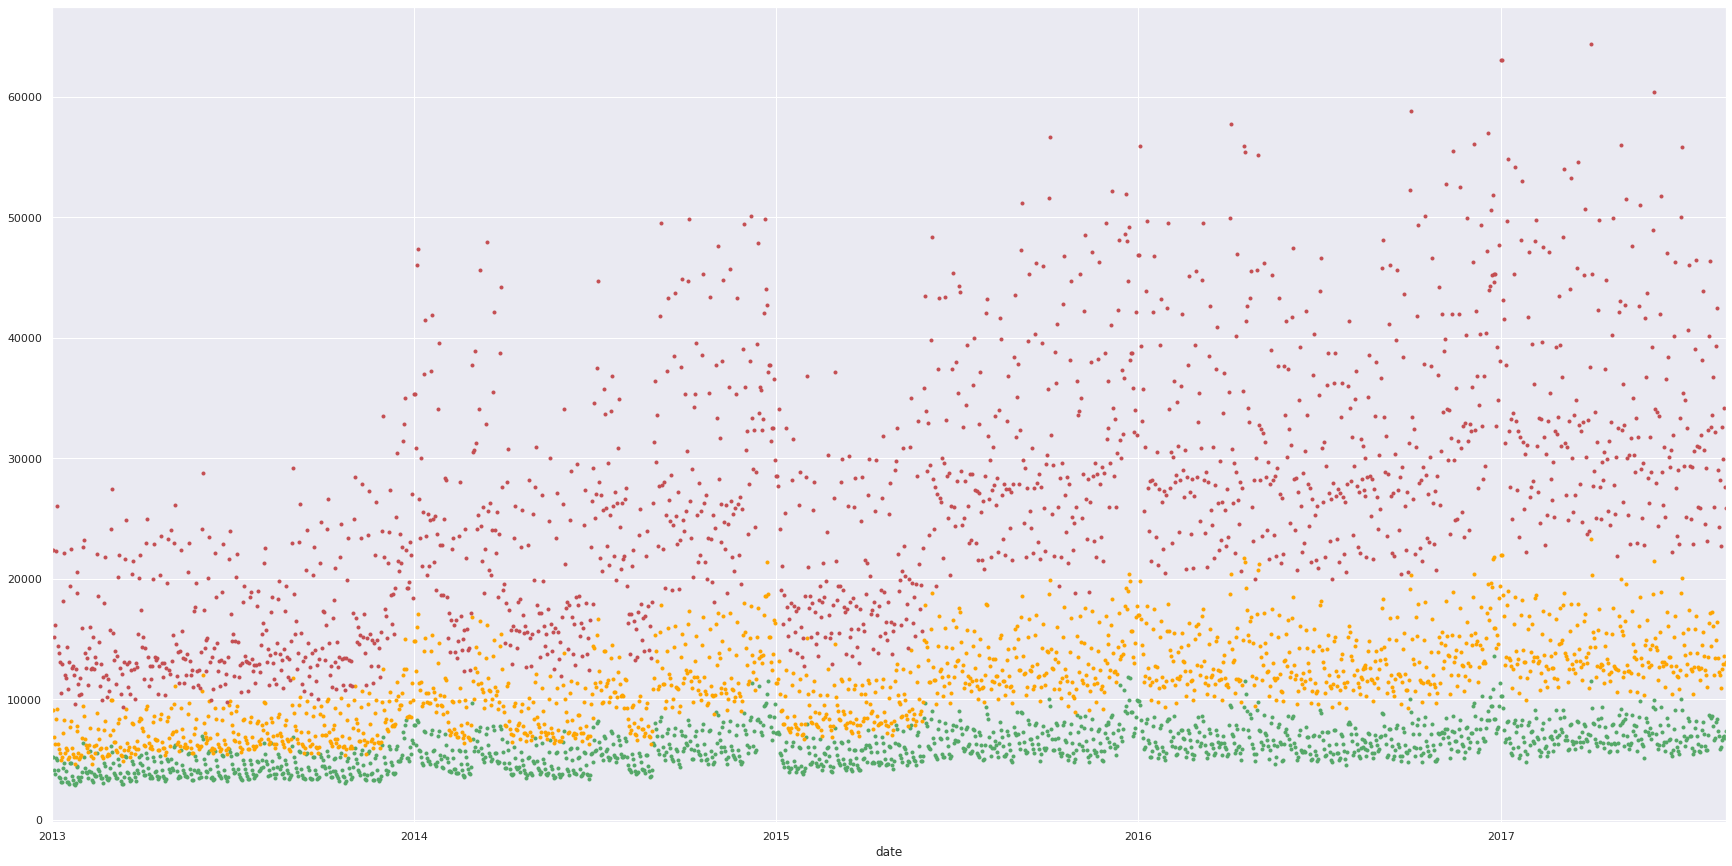

In [30]:
dfp_l.mean(axis=1).plot(marker='.', linestyle='None', color='g') #pequeñas - verde
dfm_l.mean(axis=1).plot(marker='.', linestyle='None', color='orange') #medianas - naranja
dfg_l.mean(axis=1).plot(marker='.', linestyle='None', color='r') #grandes - rojo
plt.show()

Si bien los datos de tiendas grandes parecen tener una dispersion mayor que las tiendas medianas y pequeñas, esto puede deberse unicamente a un problema de escala en el gráfico, una posible solución es utilizar escala logaritmmica. 

In [31]:
plt.yscale('log')

dfp_l.mean(axis=1).plot(marker='.', linestyle='None', color='g') #pequeñas - verde
dfm_l.mean(axis=1).plot(marker='.', linestyle='None', color='orange') #medianas - naranja
dfg_l.mean(axis=1).plot(marker='.', linestyle='None', color='r') #grandes - rojo
plt.show()

**Grafica de medias moviles de 7 periodos.

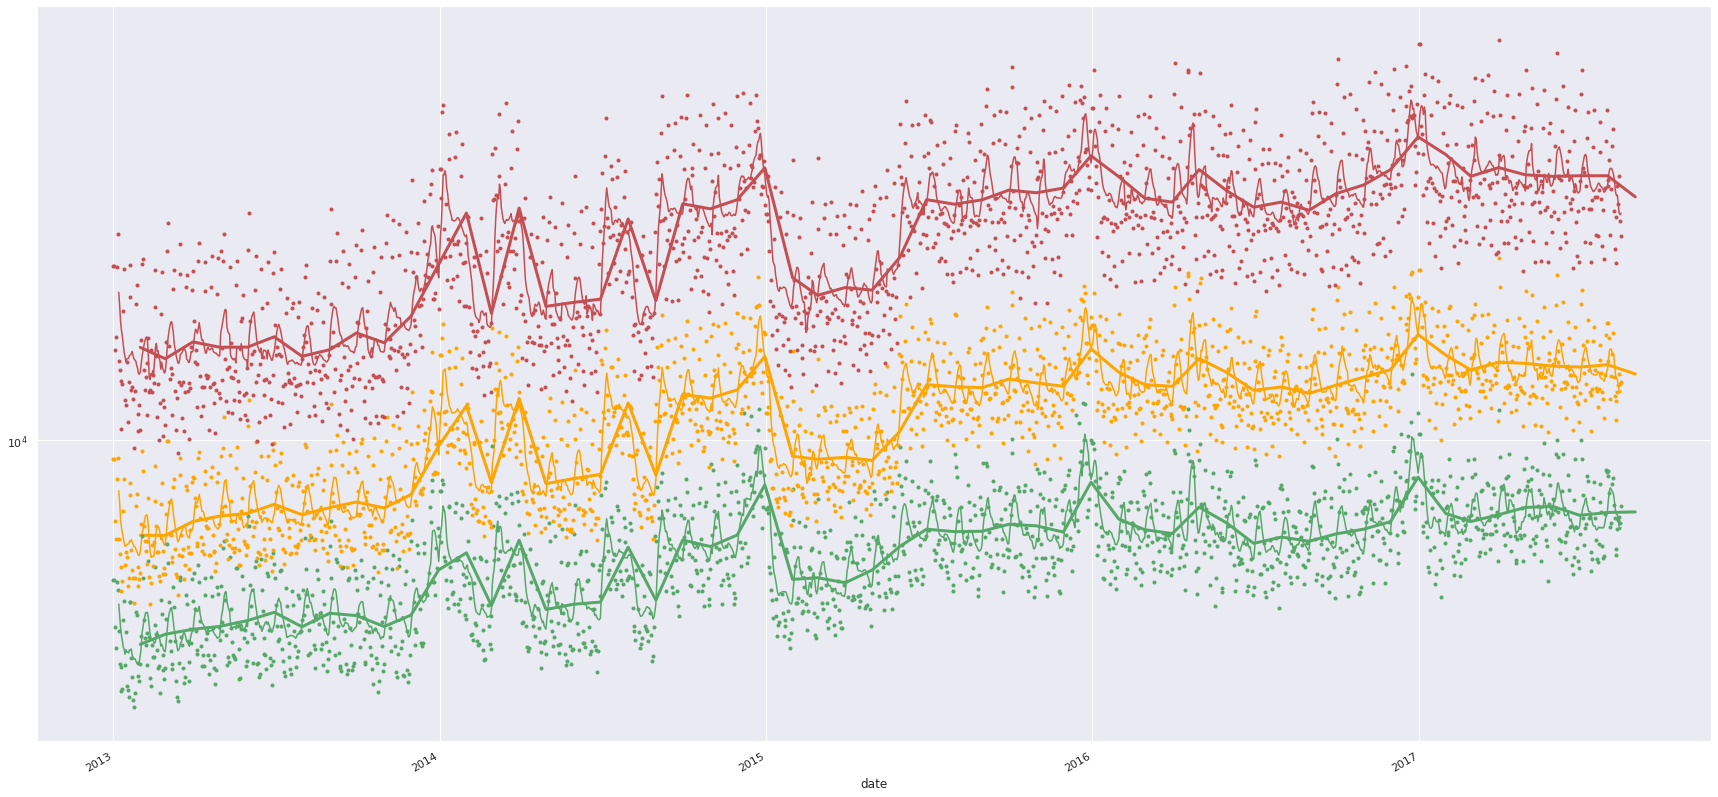

In [32]:
plt.yscale('log')

dfp_lW= dfp_l.mean(axis=1).resample('M').mean()
dfm_lW= dfm_l.mean(axis=1).resample('M').mean()
dfg_lW= dfg_l.mean(axis=1).resample('M').mean()

plt.plot(dfp_lW, color='g', linewidth=3,  label='P')
plt.plot(dfm_lW, color='orange', linewidth=3,  label='M')
plt.plot(dfg_lW, color='r', linewidth=3,  label='G')


dfp_l.mean(axis=1).rolling(7).mean().plot(color='g')
dfm_l.mean(axis=1).rolling(7).mean().plot(color='orange')
dfg_l.mean(axis=1).rolling(7).mean().plot(color='r')

dfp_l.mean(axis=1).plot(marker='.', linestyle='None', color='g') #pequeñas - verde
dfm_l.mean(axis=1).plot(marker='.', linestyle='None', color='orange') #medianas - naranja
dfg_l.mean(axis=1).plot(marker='.', linestyle='None', color='r') #grandes - rojo

plt.show()
#plt.legend(label)

Hay una tendencia marcada creciente (maximos locales mayores a los maximos locales previos y minimos locales tambien mayores a los minimos locales previos) en las sucursales con volumenes de venta de nivel medio  y en las tiendas mas grandes, en las tiendas mas pequeñas si bien tambien parece haber una tendencia creciente, es mucho menos marcada. 

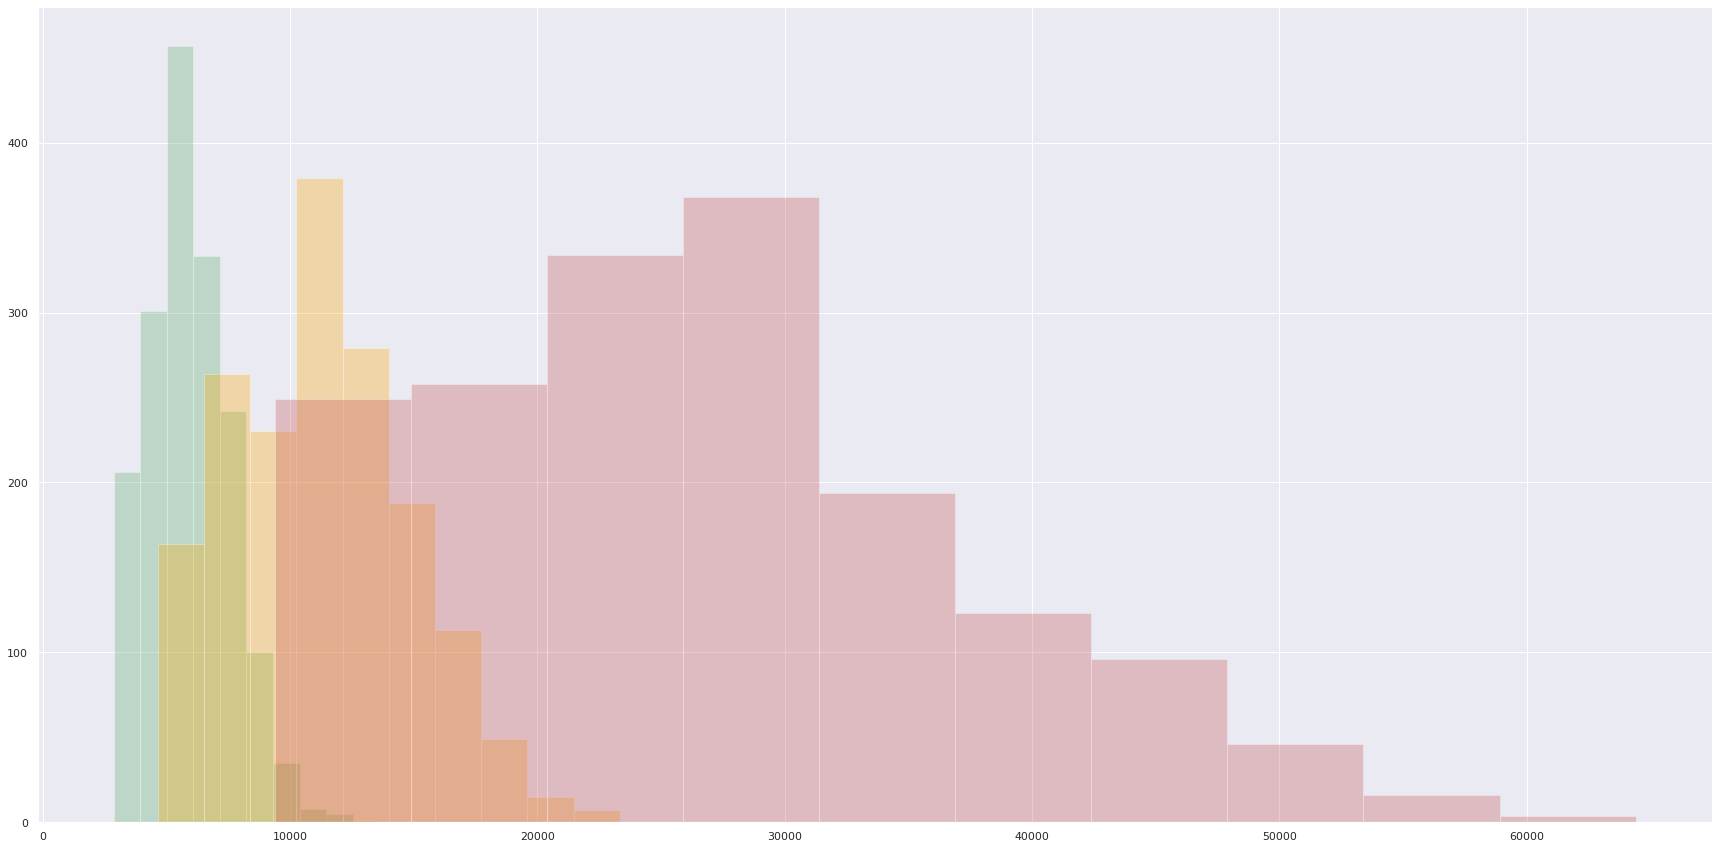

In [33]:
dfp_l.mean(axis=1).hist(alpha=0.3, color='g', label='p')
dfm_l.mean(axis=1).hist(alpha=0.3, color='orange', label='m')
dfg_l.mean(axis=1).hist(alpha=0.3, color='r', label='m')

#plt.legend(label)

Si bien las tres subpoblaciones tienen áreas de superposición, la segmentación generada por el criterio elegido, genera particiones con medidas de tendencia central bien diferenciadas. 

**¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?:**

Se podrian detectar outliers en los datos agregados, calculando las diferencias entre los datos puntuales y las lineas que corresponden a las medias moviles de cada grupo???

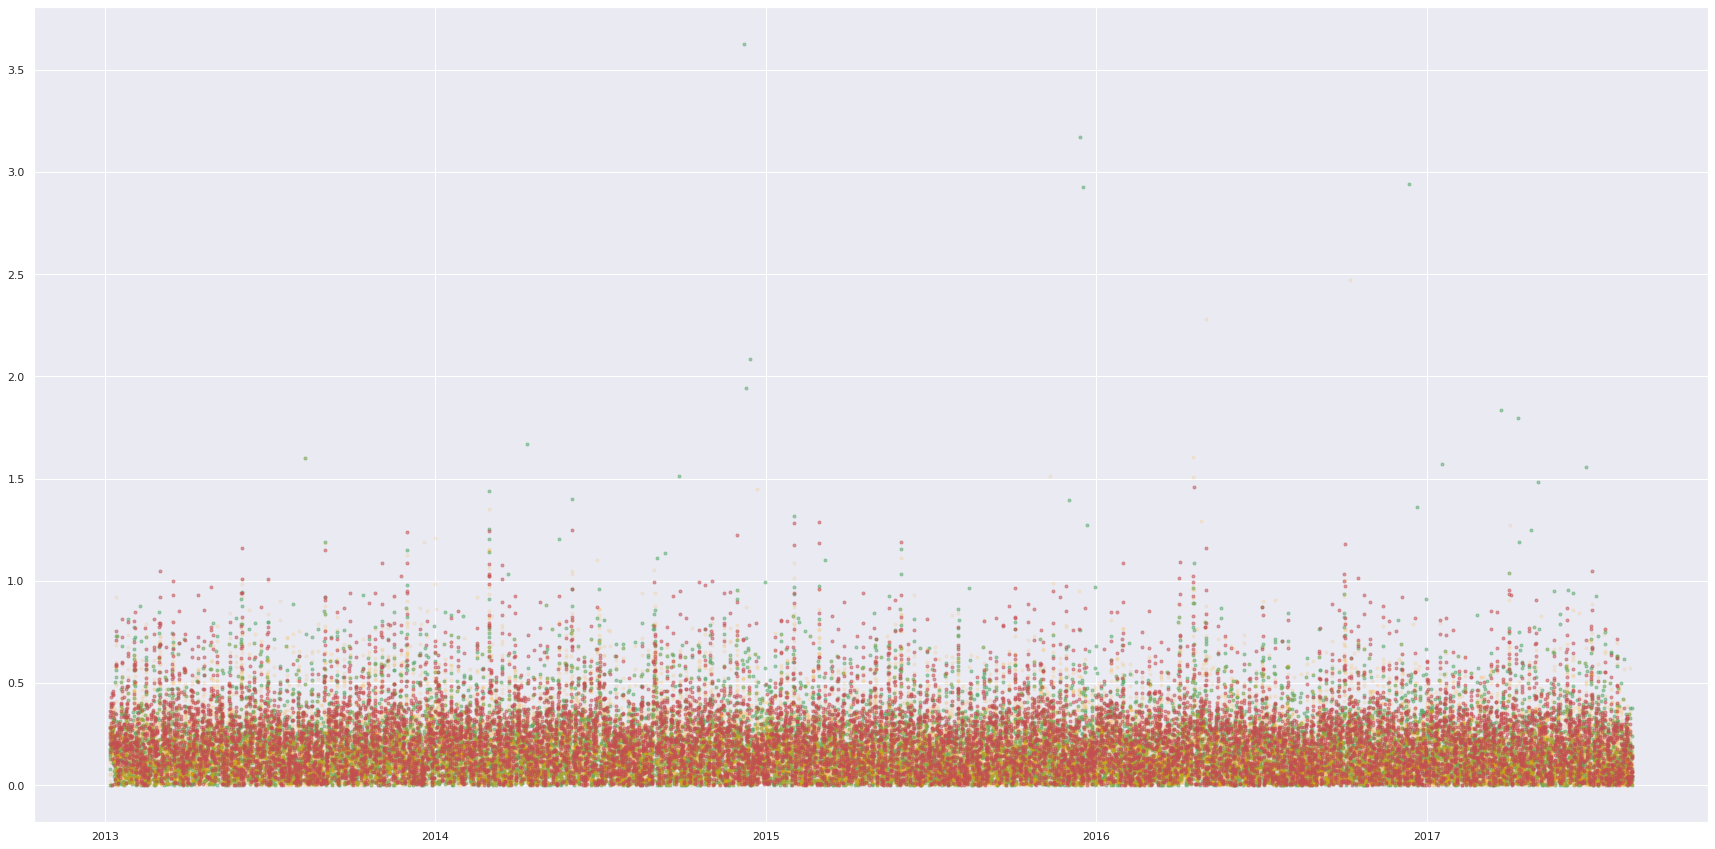

In [34]:
plt.plot(abs((dfp_l-(dfp_l.rolling(7).mean())))/dfp_l.rolling(7).mean(), marker='.', color='g', alpha=0.5, linestyle='None')
plt.plot(abs((dfm_l-(dfm_l.rolling(7).mean())))/dfm_l.rolling(7).mean(), marker='.', color='orange', alpha=0.1, linestyle='None')
plt.plot(abs((dfg_l-(dfg_l.rolling(7).mean())))/dfg_l.rolling(7).mean(), marker='.', color='r', alpha=0.5, linestyle='None')


plt.show()

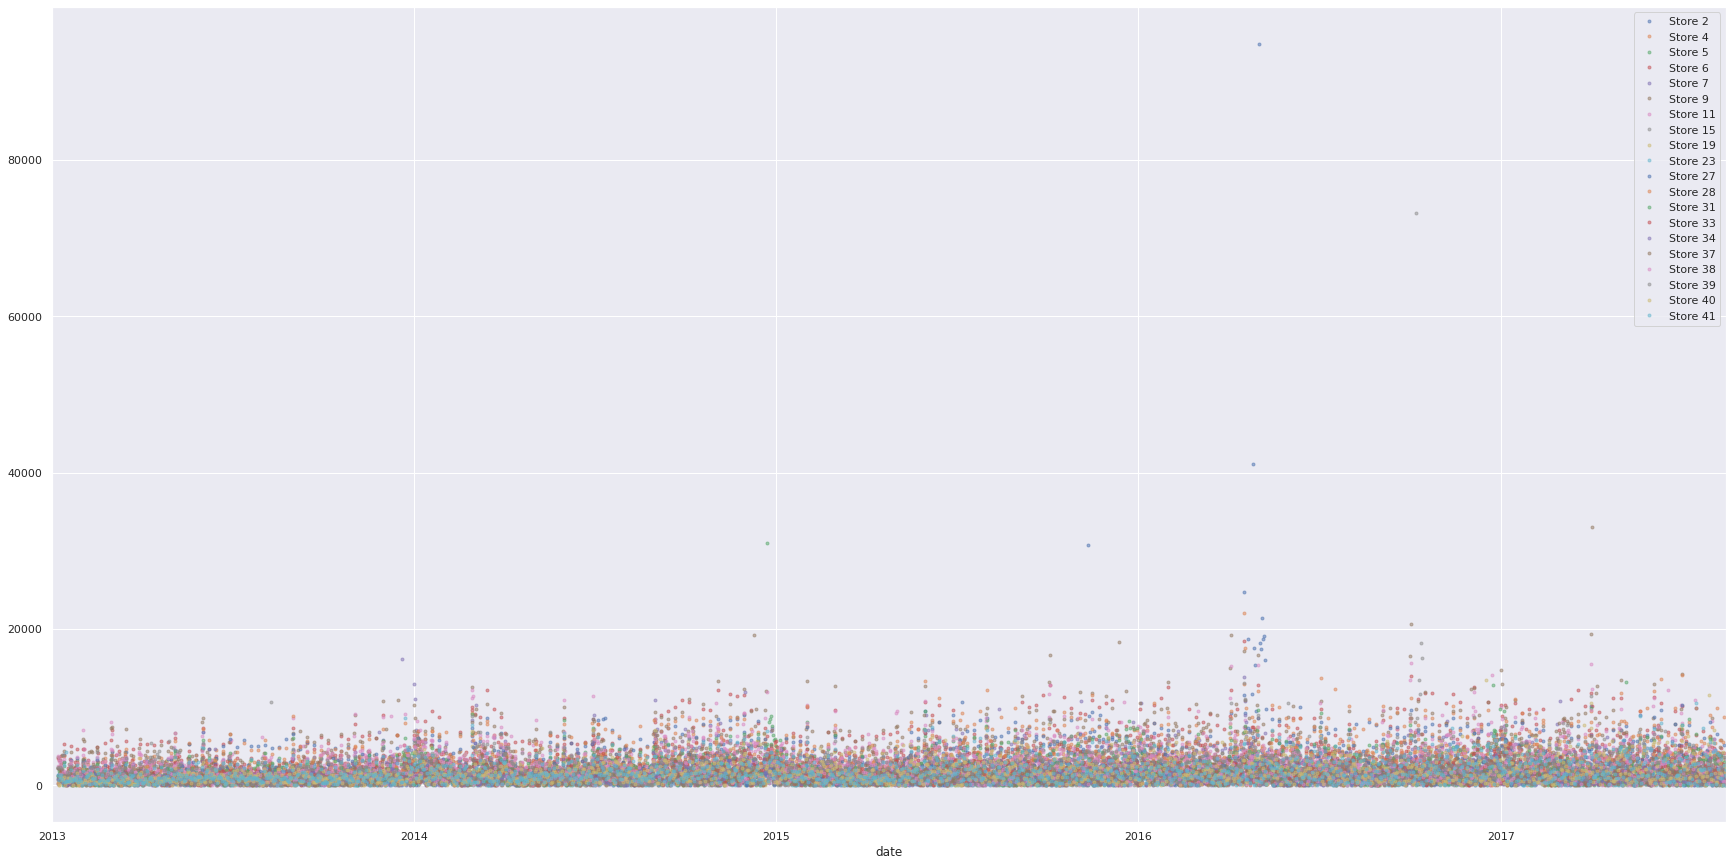

In [35]:
#dfp_l para usar las tiendas pequeñas
#dfm_l para usar las tiendas medias
#dfg_l para usar las tiendas grandes
var=dfm_l
abs((var-(var.rolling(7).mean()))).plot(marker='.', alpha=0.5, linestyle='None')
plt.show()

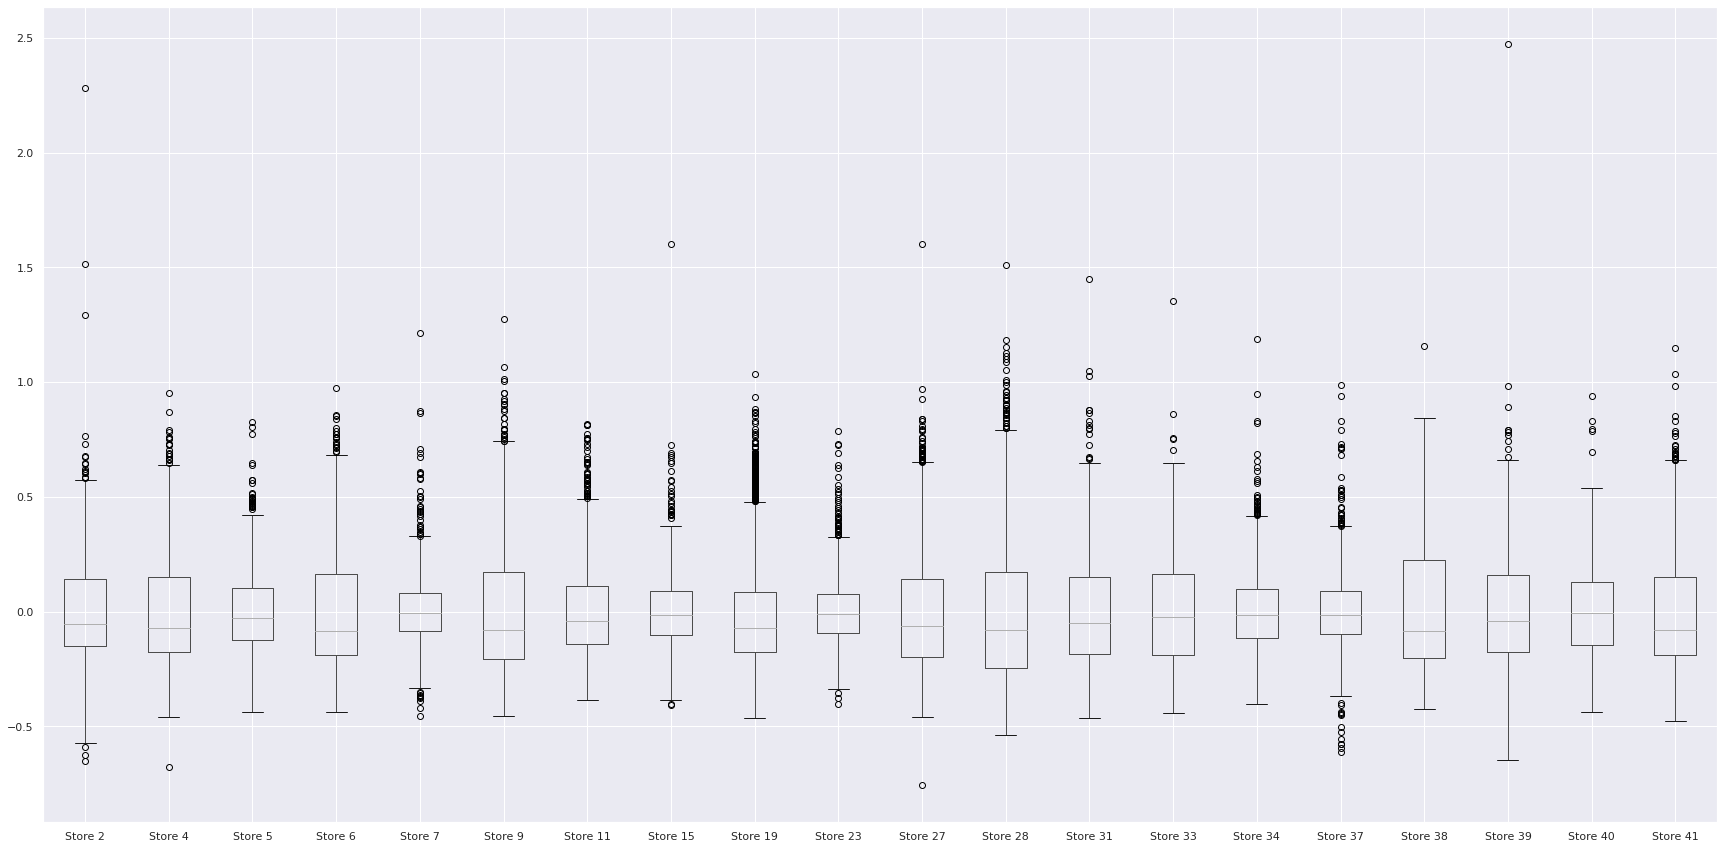

In [36]:
error=((var-(var.rolling(7).mean())))/(var.rolling(7).mean())
error.boxplot()
plt.show()

In [37]:
error['Err'] = (error > 0.4).sum(axis=1)
error[error['Err']>5]

Store 2   Store 4   Store 5   Store 6   Store 7   Store 9  \
date                                                                     
2013-01-13  0.409865  0.578818  0.368157  0.601576  0.046891  0.497874   
2013-01-20  0.363744  0.444080  0.385407  0.536560  0.019881  0.469937   
2013-01-27  0.294523  0.452340  0.156118  0.531928 -0.034513  0.387579   
2013-02-02  0.407048  0.434383  0.340591  0.503641  0.086365  0.632209   
2013-02-03  0.281499  0.499399  0.320962  0.498234 -0.107834  0.572464   
...              ...       ...       ...       ...       ...       ...   
2017-05-21  0.367856  0.471582  0.249586  0.511357  0.042364  0.380247   
2017-06-04  0.459058  0.545626  0.395995  0.572899  0.047320  0.588339   
2017-06-11  0.377759  0.612154  0.284656  0.540343 -0.022602  0.360779   
2017-07-01  0.334602  0.342658  0.077727  0.379864 -0.044661  0.545451   
2017-07-02  0.422688  0.545052  0.178951  0.548294 -0.011138  0.742843   

            Store 11  Store 15  Store 19  Store 23  Store 27  Store 28  \
date                                                                     
2013-01-13  0.170310 -0.036998  0.189493 -0.022466  0.707221  0.919809   
2013-01-20  0.287386 -0.006214  0.243362 -0.059676  0.586821  0.532057   
2013-01-27  0.226901 -0.033169  0.192808  0.071502  0.640326  0.736375   
2013-02-02  0.637547  0.427099  0.616680  0.494846  0.372400  0.468309   
2013-02-03  0.398224 -0.044963  0.063113  0.076086  0.610455  0.536222   
...              ...       ...       ...       ...       ...       ...   
2017-05-21  0.236603 -0.035910  0.292610  0.180135  0.564907  0.585415   
2017-06-04  0.468636  0.108246  0.003196  0.373120  0.555440  0.689967   
2017-06-11  0.125271 -0.024319  0.087025  0.221563  0.625490  0.857134   
2017-07-01  0.542086  0.247894  0.716904  0.162421  0.263258  0.381638   
2017-07-02  0.413312  0.091099  0.256074  0.200672  0.657544  0.886524   

            Store 31  Store 33  Store 34  Store 37  Store 38  Store 39  \
date                                                                     
2013-01-13  0.578318  0.310794  0.111571 -0.028723  0.490596  0.207657   
2013-01-20  0.348257  0.381733  0.069756  0.070627  0.463163  0.403614   
2013-01-27  0.283494  0.417726  0.132080  0.034455  0.567312  0.320513   
2013-02-02  0.572261  0.456589  0.465160  0.457660  0.561257  0.461611   
2013-02-03  0.385076  0.281103  0.168410  0.068271  0.421248  0.309316   
...              ...       ...       ...       ...       ...       ...   
2017-05-21  0.463406  0.214919  0.076168 -0.001430  0.376123  0.372123   
2017-06-04  0.384252  0.414808  0.191387  0.188003  0.454976  0.340991   
2017-06-11  0.472844  0.211288  0.110901 -0.107422  0.283405  0.191405   
2017-07-01  0.526959  0.445945  0.411642  0.322464  0.702557  0.432562   
2017-07-02  0.540945  0.290814  0.299160  0.107745  0.500600  0.408668   

            Store 40  Store 41  Err  
date                                 
2013-01-13  0.247144  0.685953    9  
2013-01-20  0.163171  0.519785    8  
2013-01-27  0.086187  0.675932    7  
2013-02-02  0.461848  0.447062   17  
2013-02-03  0.097919  0.593075    7  
...              ...       ...  ...  
2017-05-21  0.106928  0.665680    6  
2017-06-04  0.342302  0.489434   10  
2017-06-11 -0.017117  0.536329    6  
2017-07-01  0.538373  0.255830    9  
2017-07-02  0.371976  0.560220   11  

[159 rows x 21 columns]

Los valores que difieren mucho de la media en general se dan en los ultimos/primeros dos días de cada mes, consideramos que estos valores anormales no se deben a errores en la base de datos, sino que se deben a las fechas de cobro de los trabajadores mensualizados, lo que genera una dinamica de estacionalidad intramensual. 

También se pueden observar estas diferencias, en algunos casos a mitad de més, algo que tambien podria deberse a el pago de quincenas en algunos tipos de trabajos, algo que también es parte de la estacionalidad mencionada anteriormente.

Hay un tercer tipo de valor anormal, que se presenta en fechas fuera de los dos tipos propuestos anteriormente, un ejemplo de esto es el 24/12, que no esta ni a final de mes, ni a principios y tampoco coincide con una quincena, sin embargo se trata de un día festivo con un fuerte componente comercial a nivel mundial, luego analizaremos en más profundidad las fechas para averiguar si más de estos valores anormales se corresponden a días festivos. 

In [38]:
df_agg = pd.DataFrame(columns=['Peq', 'Med', 'Gra'])

df_agg['Peq']=dfp_l.mean(axis=1)
df_agg['Med']=dfm_l.mean(axis=1)
df_agg['Gra']=dfg_l.mean(axis=1)
df_agg['Year'] = df_agg.index.year
df_agg['Month'] = df_agg.index.month
df_agg['Day'] = df_agg.index.day
df_agg['W Day'] = df_agg.index.weekday

In [39]:
df_agg

Peq           Med           Gra  Year  Month  Day  W Day
date                                                                        
2013-01-01  5198.945201   9123.183550  22439.586106  2013      1    1      1
2013-01-02  5198.945201   9123.183550  22439.586106  2013      1    2      2
2013-01-03  4177.222699   6845.662703  15188.723227  2013      1    3      3
2013-01-04  3784.500899   6289.179401  16146.390121  2013      1    4      4
2013-01-05  5149.129303   8336.803355  22346.834454  2013      1    5      5
...                 ...           ...           ...   ...    ...  ...    ...
2017-08-11  6609.842200  12508.193649  32572.655446  2017      8   11      4
2017-08-12  6875.007901  12910.578801  29925.169462  2017      8   12      5
2017-08-13  6985.004899  13602.081156  34208.614370  2017      8   13      6
2017-08-14  6789.405798  12942.913497  27634.141892  2017      8   14      0
2017-08-15  7343.307401  13066.180048  25877.185219  2017      8   15      1

[1688 rows x 7 columns]

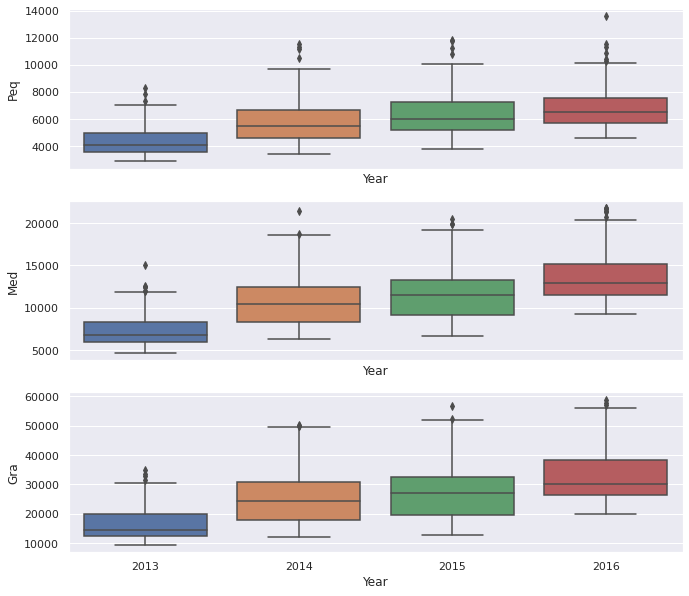

In [40]:
# Start and end of the date range to extract
start, end = '2013-01-01', '2016-12-31'

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg.loc[start:end], x='Year', y=name, ax=ax)
  #ax.set_ylabel('$')
  
if ax != axes[-1]:
    ax.set_xlabel('')

Se puede ver claramente que existe tendencia creciente año a año, utilizamos el intervalo de tiempo 2013 - 2016, descartando los datos del año 2017, que abarcan solo los primeros 8 meses del año.

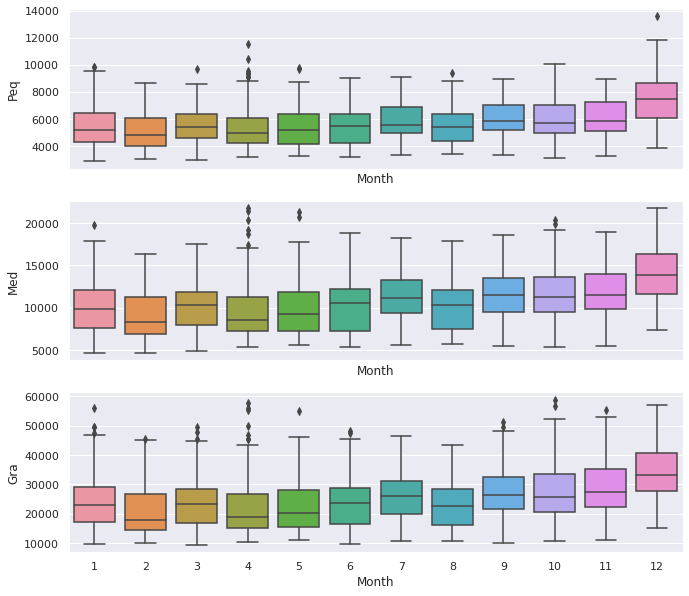

In [41]:
start, end = '2013-01-01', '2016-12-31'
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg[start:end], x='Month', y=name, ax=ax)

  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')

En este caso si bien se observa en los boxplot el aumento de ventas de diciembre, pero no se puede extraer ningun resultado concluyente de la estacionalidad, posiblemente sea porque el efeto tendencia "ensucia' los datos agregados de forma mensual. 



#Boxplot's interanuales sin agregación.

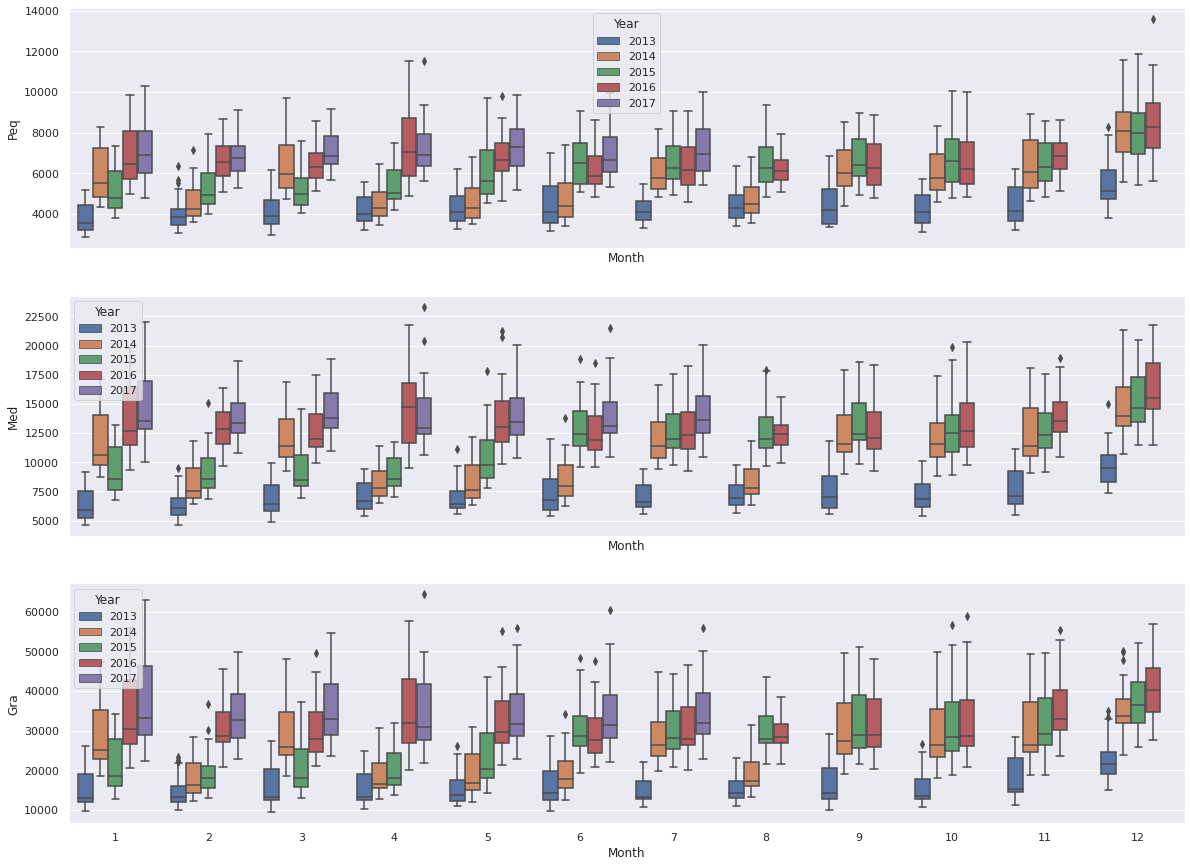

In [42]:
start, end = '2013-01-01', '2017-07-31' #En este caso utilizamos los datos hasta el ultimo mes que contamos con la totalidad de los dias.
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg[start:end], x='Month', y=name, ax=ax, hue='Year')
  
  #ax.set_title(name)



#Analisis estacionalidad intramensual

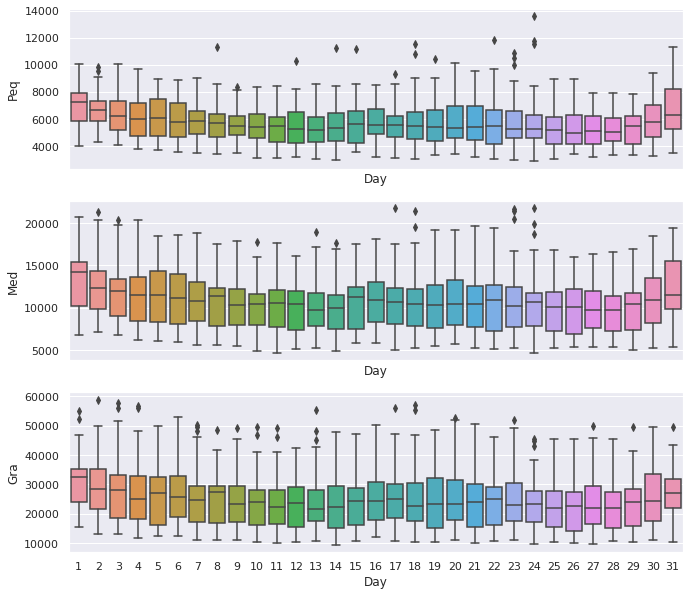

In [43]:
start, end = '2013-01-01', '2016-12-31'
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg[start:end], x='Day', y=name, ax=ax)

  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')

Como habiamos supuesto durante el análisis de outliers, se puede ver que los montos de ventas a lo largo del mes caen en relacion a los valores alcanzados durante los primeros y los ultimos dias.

# Analisis estacionalidad intrasemanal

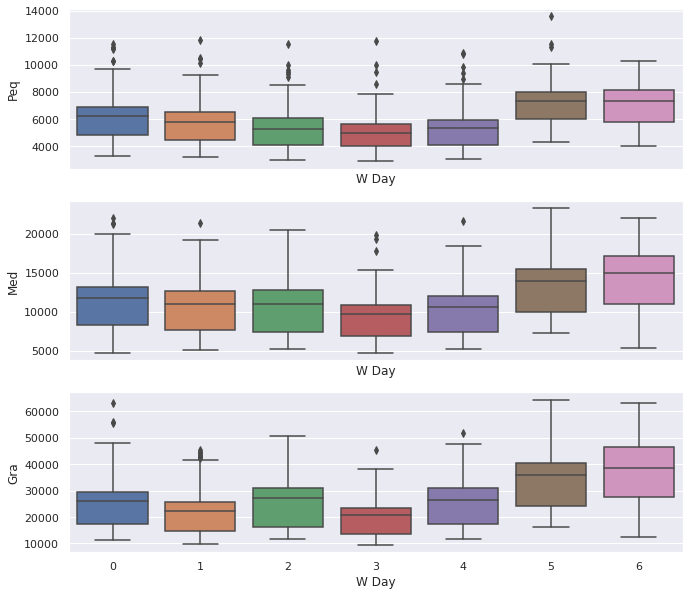

In [44]:
start, end = '2013-01-01', '2017-07-31'
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg[start:end], x='W Day', y=name, ax=ax)

if ax != axes[-1]:
    ax.set_xlabel('')

#0 - Lunes, 1 - Martes, 2 - Miercoles, ...

Respecto a los días de la semana, se puede ver que los jueves son el día con las ventas más bajas, para cualquier tipo de tienda, mientras que los dias del fin de semana (Sabado y Domingo), tienen ventas muy por encima del nivel de los otros 5 días de la semana. 

# Diagrama de dispersión entre la serie y su valor retardado un período.



In [45]:
df_agg

Peq           Med           Gra  Year  Month  Day  W Day
date                                                                        
2013-01-01  5198.945201   9123.183550  22439.586106  2013      1    1      1
2013-01-02  5198.945201   9123.183550  22439.586106  2013      1    2      2
2013-01-03  4177.222699   6845.662703  15188.723227  2013      1    3      3
2013-01-04  3784.500899   6289.179401  16146.390121  2013      1    4      4
2013-01-05  5149.129303   8336.803355  22346.834454  2013      1    5      5
...                 ...           ...           ...   ...    ...  ...    ...
2017-08-11  6609.842200  12508.193649  32572.655446  2017      8   11      4
2017-08-12  6875.007901  12910.578801  29925.169462  2017      8   12      5
2017-08-13  6985.004899  13602.081156  34208.614370  2017      8   13      6
2017-08-14  6789.405798  12942.913497  27634.141892  2017      8   14      0
2017-08-15  7343.307401  13066.180048  25877.185219  2017      8   15      1

[1688 rows x 7 columns]

In [46]:
df_agg_Cshift=df_agg

In [47]:
df_agg_Cshift=df_agg
df_agg_Cshift['Peq-1']=df_agg['Peq'].shift(periods=-1)
df_agg_Cshift['Med-1']=df_agg['Med'].shift(periods=-1)
df_agg_Cshift['Gra-1']=df_agg['Gra'].shift(periods=-1)
df_agg_Cshift

Peq           Med           Gra  Year  Month  Day  W Day  \
date                                                                           
2013-01-01  5198.945201   9123.183550  22439.586106  2013      1    1      1   
2013-01-02  5198.945201   9123.183550  22439.586106  2013      1    2      2   
2013-01-03  4177.222699   6845.662703  15188.723227  2013      1    3      3   
2013-01-04  3784.500899   6289.179401  16146.390121  2013      1    4      4   
2013-01-05  5149.129303   8336.803355  22346.834454  2013      1    5      5   
...                 ...           ...           ...   ...    ...  ...    ...   
2017-08-11  6609.842200  12508.193649  32572.655446  2017      8   11      4   
2017-08-12  6875.007901  12910.578801  29925.169462  2017      8   12      5   
2017-08-13  6985.004899  13602.081156  34208.614370  2017      8   13      6   
2017-08-14  6789.405798  12942.913497  27634.141892  2017      8   14      0   
2017-08-15  7343.307401  13066.180048  25877.185219  2017      8   15      1   

                  Peq-1         Med-1         Gra-1  
date                                                 
2013-01-01  5198.945201   9123.183550  22439.586106  
2013-01-02  4177.222699   6845.662703  15188.723227  
2013-01-03  3784.500899   6289.179401  16146.390121  
2013-01-04  5149.129303   8336.803355  22346.834454  
2013-01-05  4961.404100   9193.538704  26058.244110  
...                 ...           ...           ...  
2017-08-11  6875.007901  12910.578801  29925.169462  
2017-08-12  6985.004899  13602.081156  34208.614370  
2017-08-13  6789.405798  12942.913497  27634.141892  
2017-08-14  7343.307401  13066.180048  25877.185219  
2017-08-15          NaN           NaN           NaN  

[1688 rows x 10 columns]

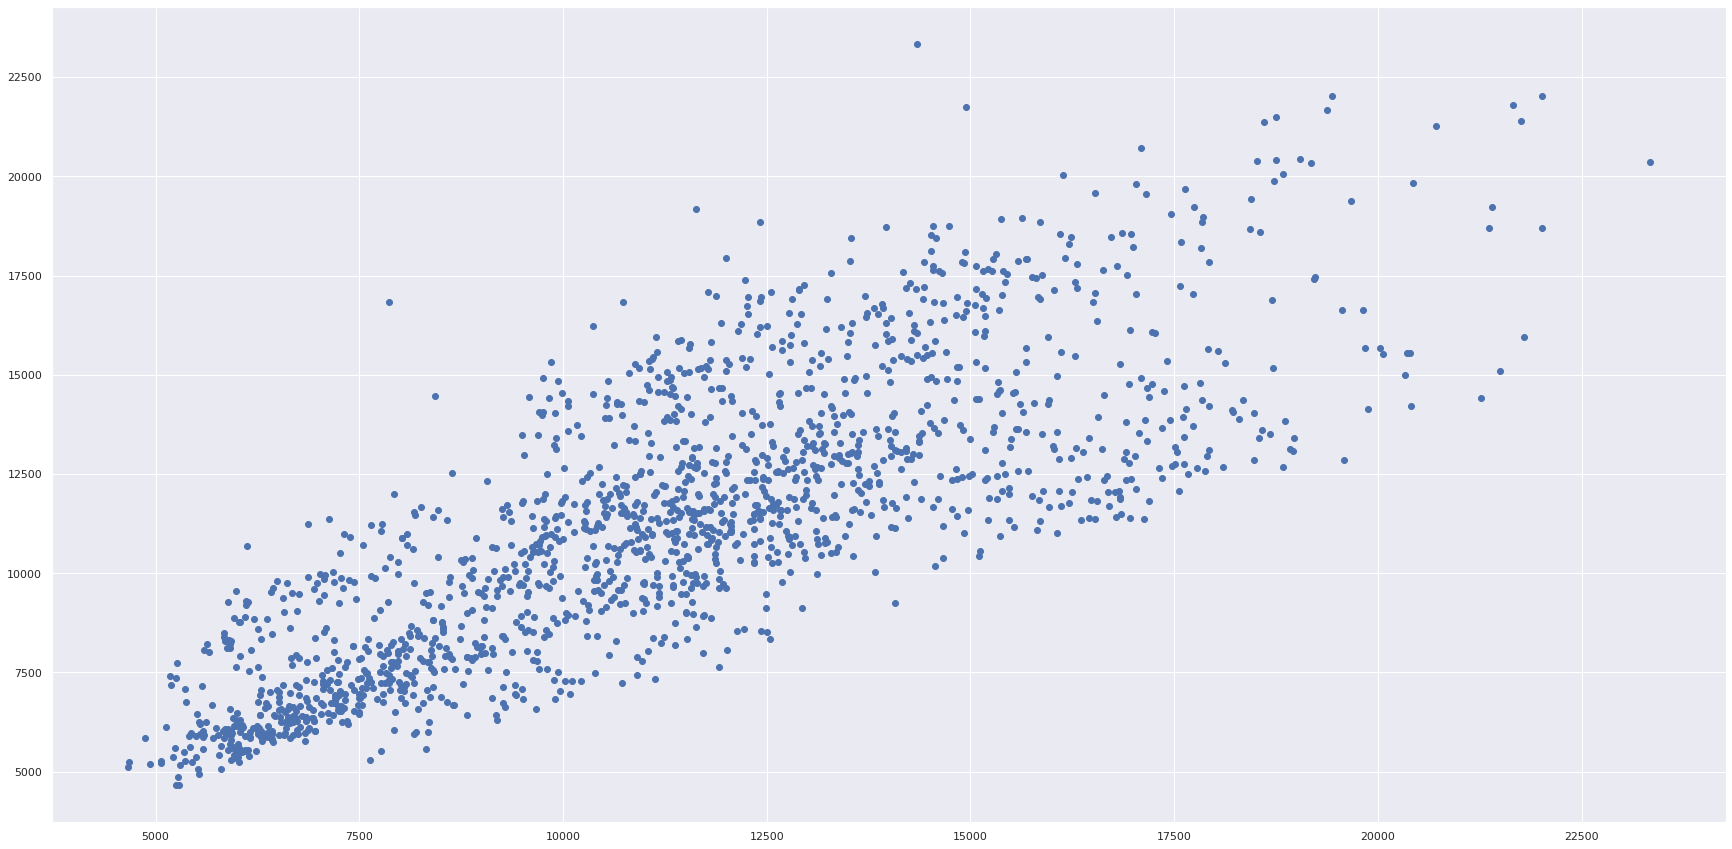

In [48]:
#plt.plot(df_agg_Cshift['Peq'], df_agg_Cshift['Peq-1'], marker='o', linestyle='None')
plt.plot(df_agg_Cshift['Med'], df_agg_Cshift['Med-1'], marker='o', linestyle='None')
#plt.plot(df_agg_Cshift['Gra'], df_agg_Cshift['Gra-1'], marker='o', linestyle='None')
plt.show()

Repetir el mismo procedimiento entre la serie y sus valores retardados 2, 3 y 4 períodos.

In [49]:
df_agg_Cshift['Med-2']=df_agg['Med'].shift(periods=-2)
df_agg_Cshift['Med-3']=df_agg['Med'].shift(periods=-3)
df_agg_Cshift['Med-4']=df_agg['Med'].shift(periods=-4)
df_agg_Cshift['Med-7']=df_agg['Med'].shift(periods=-7)
df_agg_Cshift

Peq           Med           Gra  Year  Month  Day  W Day  \
date                                                                           
2013-01-01  5198.945201   9123.183550  22439.586106  2013      1    1      1   
2013-01-02  5198.945201   9123.183550  22439.586106  2013      1    2      2   
2013-01-03  4177.222699   6845.662703  15188.723227  2013      1    3      3   
2013-01-04  3784.500899   6289.179401  16146.390121  2013      1    4      4   
2013-01-05  5149.129303   8336.803355  22346.834454  2013      1    5      5   
...                 ...           ...           ...   ...    ...  ...    ...   
2017-08-11  6609.842200  12508.193649  32572.655446  2017      8   11      4   
2017-08-12  6875.007901  12910.578801  29925.169462  2017      8   12      5   
2017-08-13  6985.004899  13602.081156  34208.614370  2017      8   13      6   
2017-08-14  6789.405798  12942.913497  27634.141892  2017      8   14      0   
2017-08-15  7343.307401  13066.180048  25877.185219  2017      8   15      1   

                  Peq-1         Med-1         Gra-1         Med-2  \
date                                                                
2013-01-01  5198.945201   9123.183550  22439.586106   6845.662703   
2013-01-02  4177.222699   6845.662703  15188.723227   6289.179401   
2013-01-03  3784.500899   6289.179401  16146.390121   8336.803355   
2013-01-04  5149.129303   8336.803355  22346.834454   9193.538704   
2013-01-05  4961.404100   9193.538704  26058.244110   6292.232205   
...                 ...           ...           ...           ...   
2017-08-11  6875.007901  12910.578801  29925.169462  13602.081156   
2017-08-12  6985.004899  13602.081156  34208.614370  12942.913497   
2017-08-13  6789.405798  12942.913497  27634.141892  13066.180048   
2017-08-14  7343.307401  13066.180048  25877.185219           NaN   
2017-08-15          NaN           NaN           NaN           NaN   

                   Med-3         Med-4        Med-7  
date                                                 
2013-01-01   6289.179401   8336.803355  5884.913799  
2013-01-02   8336.803355   9193.538704  5534.276701  
2013-01-03   9193.538704   6292.232205  4936.842452  
2013-01-04   6292.232205   5884.913799  5193.792750  
2013-01-05   5884.913799   5534.276701  7194.126199  
...                  ...           ...          ...  
2017-08-11  12942.913497  13066.180048          NaN  
2017-08-12  13066.180048           NaN          NaN  
2017-08-13           NaN           NaN          NaN  
2017-08-14           NaN           NaN          NaN  
2017-08-15           NaN           NaN          NaN  

[1688 rows x 14 columns]

In [50]:
import matplotlib.patches as mpatches

In [51]:
var=df_agg['Gra']
g = mpatches.Patch(color='g', label='lag -1')
b = mpatches.Patch(color='b', label='lag -2')
o = mpatches.Patch(color='orange', label='lag -3')
r = mpatches.Patch(color='r', label='lag -4')

plt.legend(handles=[g,b,o,r])

M_1=plt.plot(var, var.shift(periods=-1), marker='o', linestyle='None', color='g')
M_2=plt.plot(var, var.shift(periods=-2), marker='o', linestyle='None', color='b')
M_3=plt.plot(var, var.shift(periods=-3), marker='o', linestyle='None', color='orange')
M_4=plt.plot(var, var.shift(periods=-4), marker='o', linestyle='None', color='r')
plt.show()

La correlación con los valores retrasados parece disminuir a medida que el n°de retraso aumenta, sin embargo nos interesa averiguar la correlación con el lag=7, por la estacionalidad semanal.

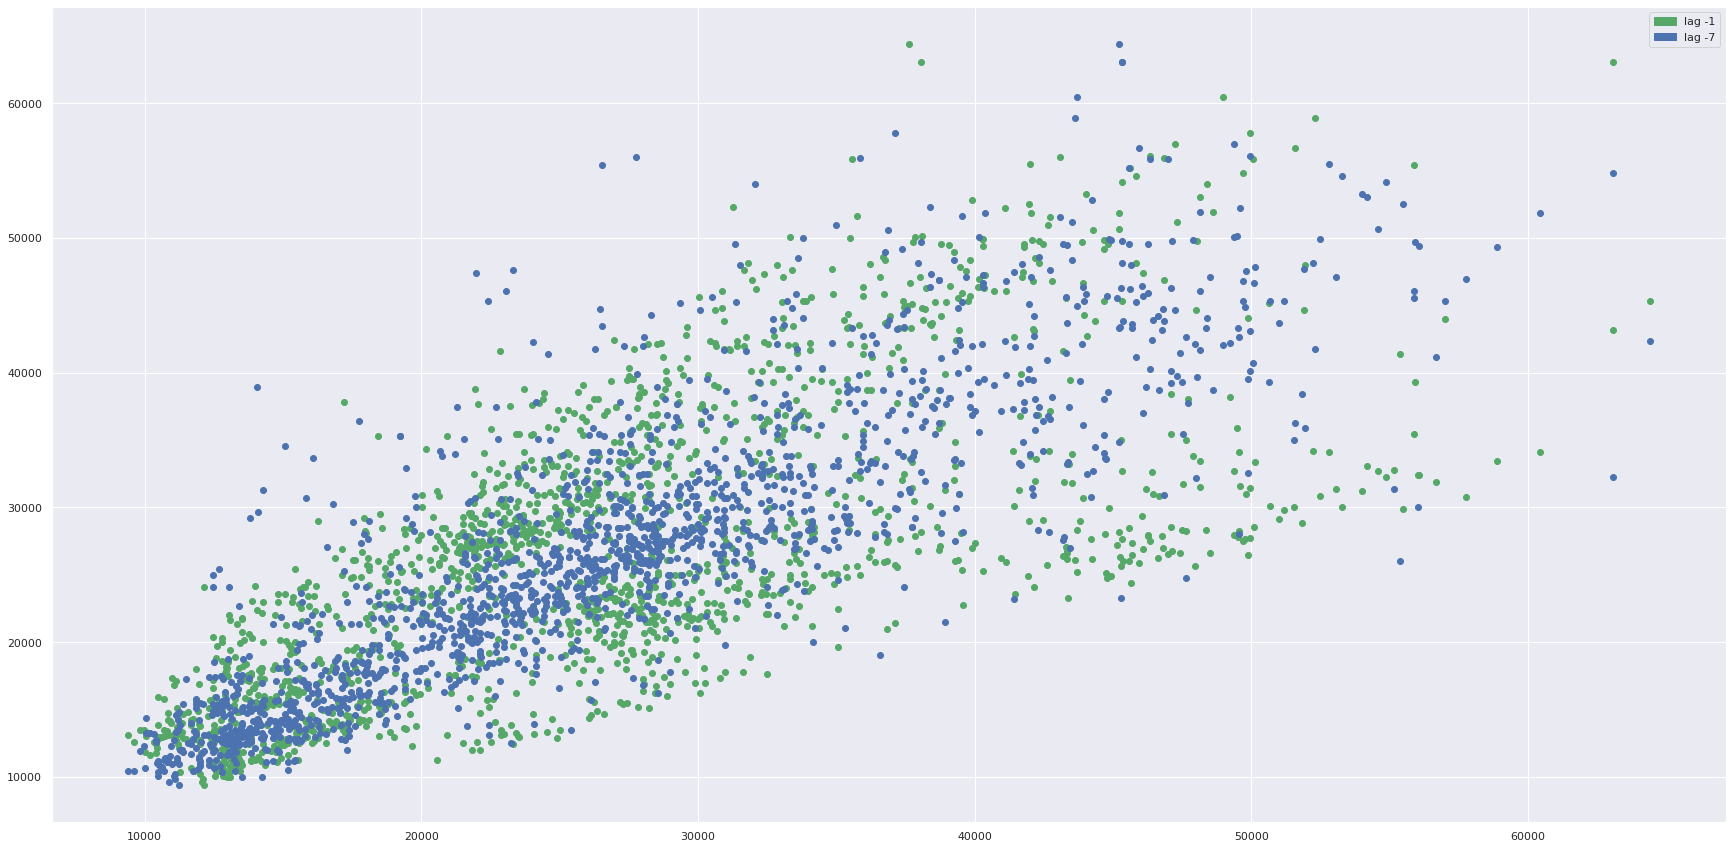

In [52]:
#plt.yscale('log')

g = mpatches.Patch(color='g', label='lag -1')
b = mpatches.Patch(color='b', label='lag -7')

plt.legend(handles=[g,b])

M_1=plt.plot(var, var.shift(periods=-1), marker='o', linestyle='None', color='g')
M_2=plt.plot(var, var.shift(periods=-7), marker='o', linestyle='None', color='b')

plt.show()

La correlación con atraso de 7 períodos, parece aumentar incluso por encima de el 1 lag, principalmente para valores chicos, esto último arroja dudas hacerca de la homocedasticidad, que analizaremos más adelante. 

### **Funciones de autocorrelación (ACF) y autocorrelación parcial (PACF):**

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


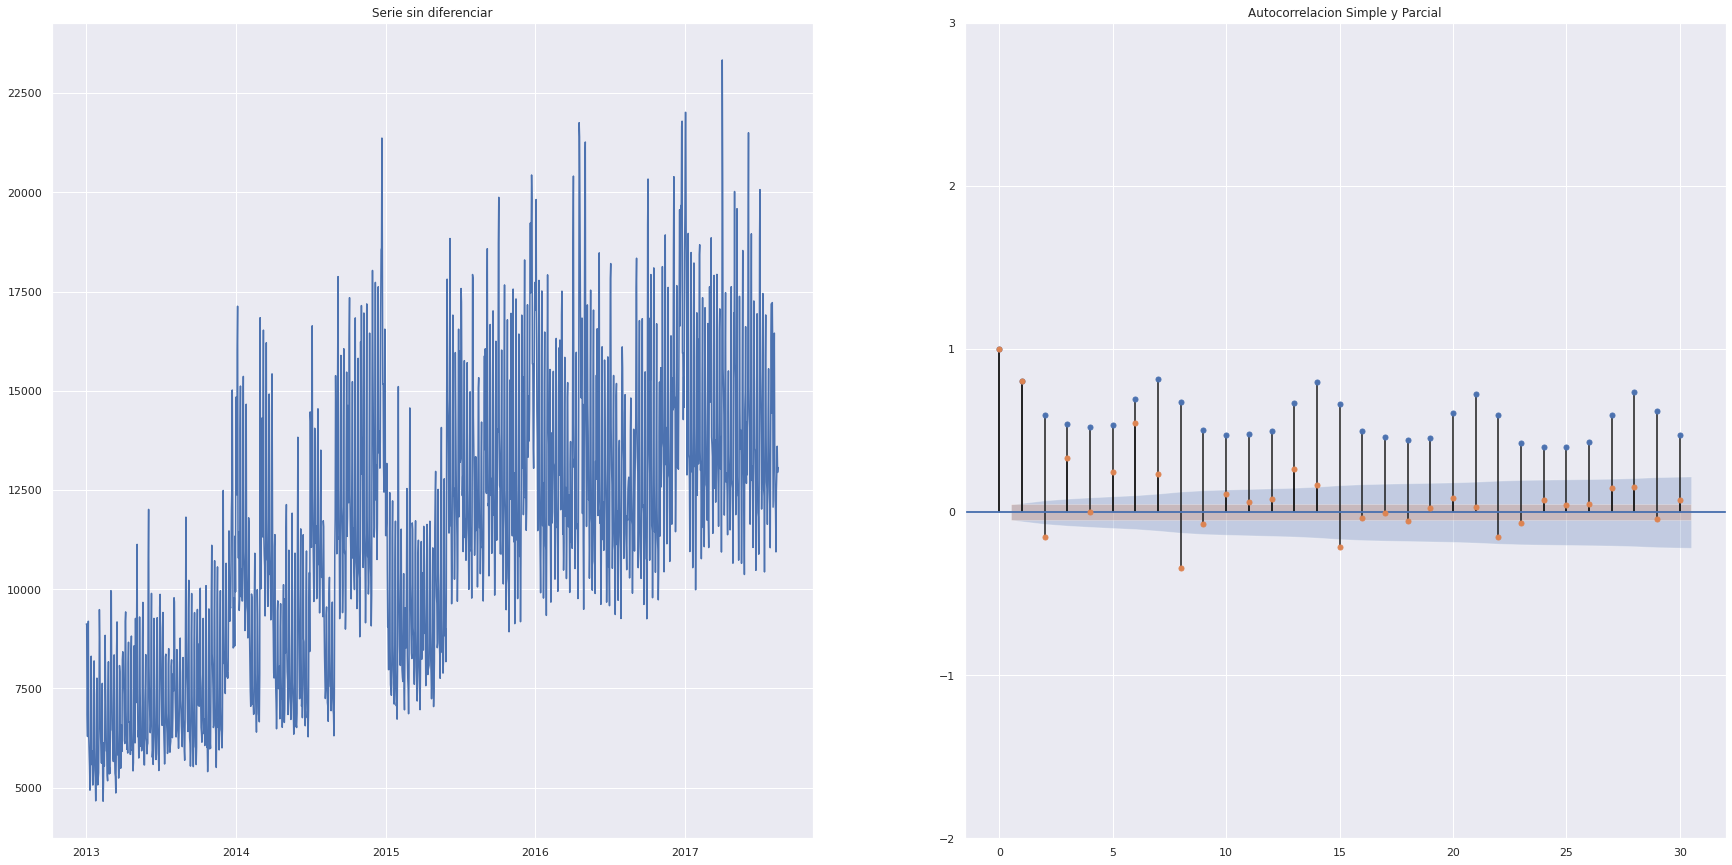

In [54]:
v=df_agg['Med']

fig, axes= plt.subplots(1,2, sharex=False)
axes[0].plot(v); axes[0].set_title('Serie sin diferenciar')
axes[1].set(ylim=(-2,3))
plot_acf(v, ax=axes[1], lags=30)
plot_pacf(v, ax=axes[1], lags=30)
plt.title('Autocorrelacion Simple y Parcial')
plt.show()

La autocorrelación parece oscilar en los datos sin diferenciar, mientras que la autocorrelación parcial recien en el 5 término cae dentro de la zona critica.

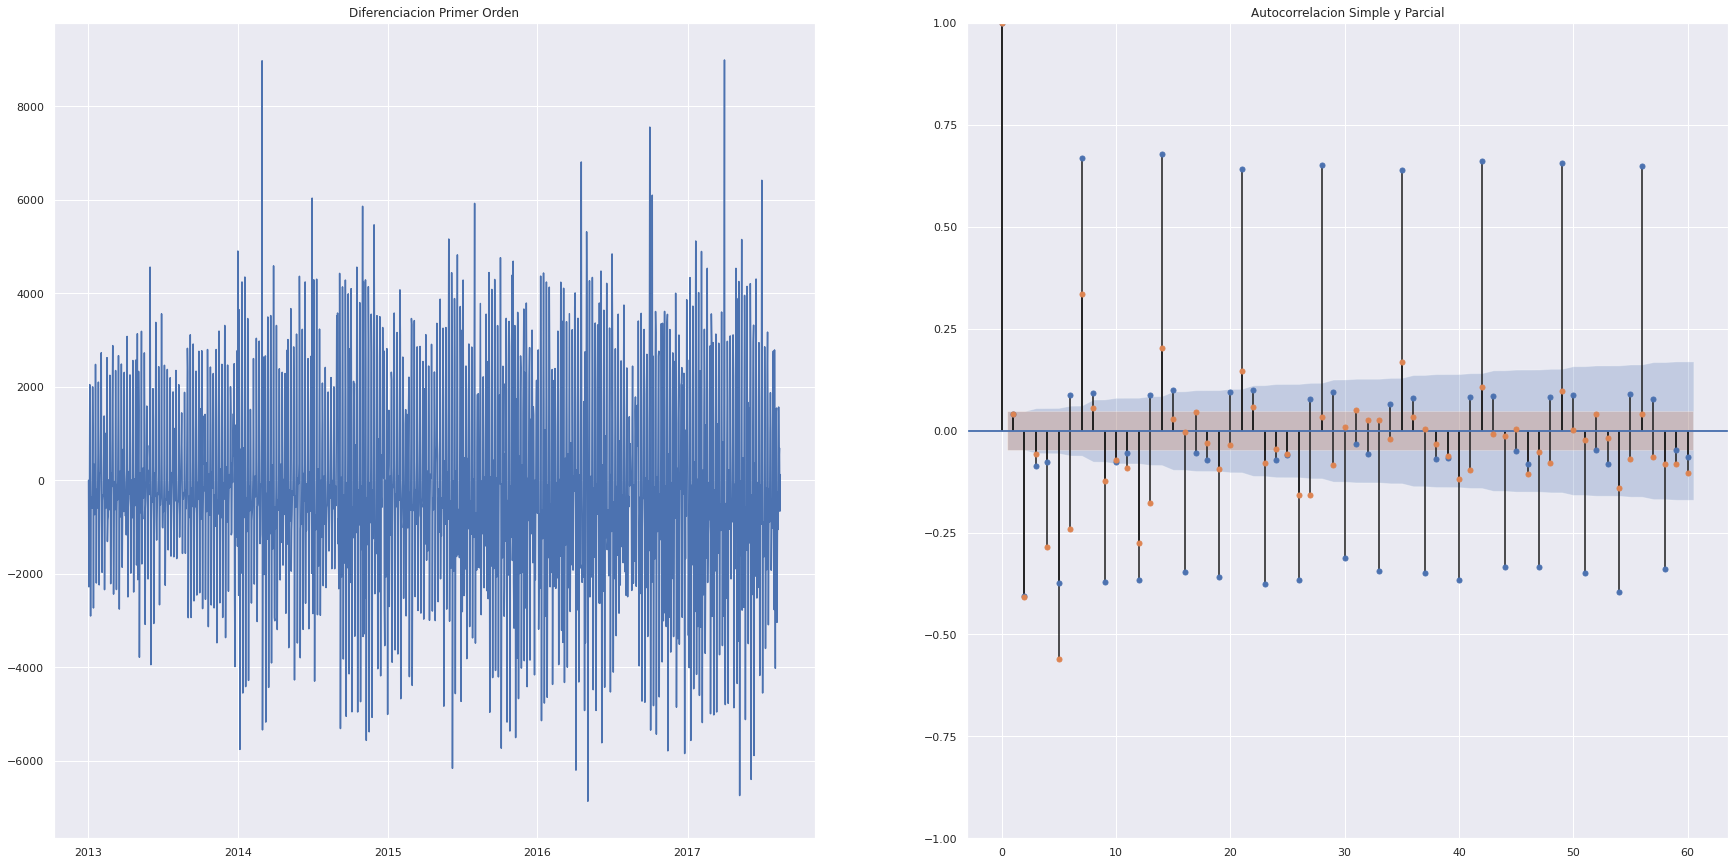

In [55]:
fig, axes= plt.subplots(1,2, sharex=False)
axes[0].plot(v.diff()); axes[0].set_title('Diferenciacion Primer Orden')
axes[1].set(ylim=(-1,1))
plot_acf(v.diff().dropna(), ax=axes[1], lags=60)
plot_pacf(v.diff().dropna(), ax=axes[1], lags=60)
plt.title('Autocorrelacion Simple y Parcial')


plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


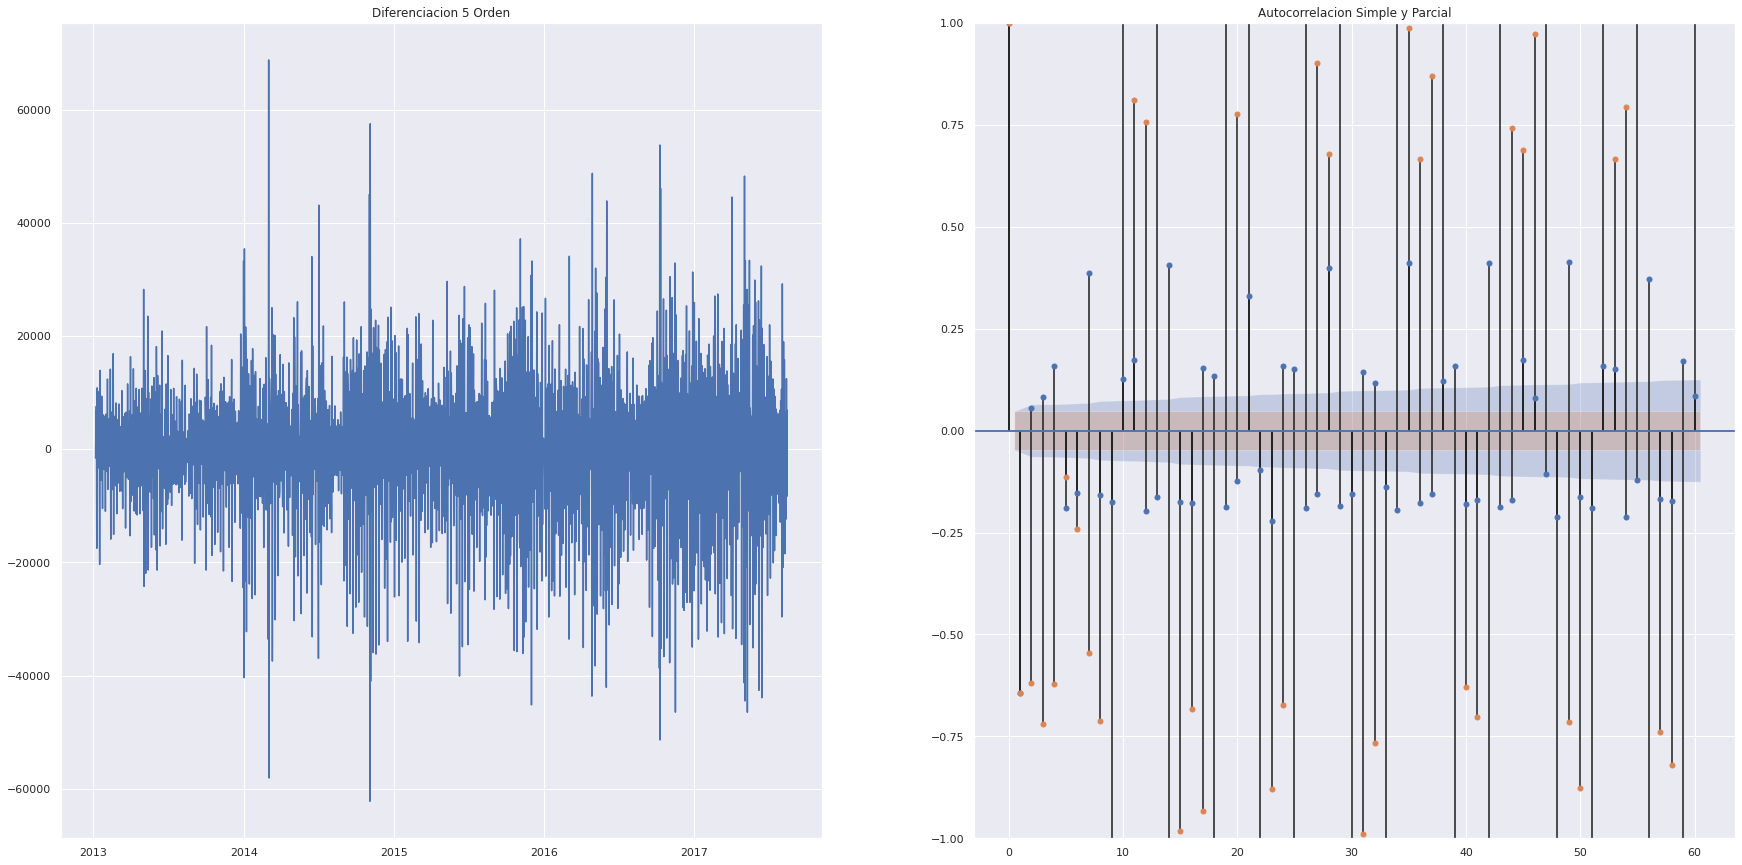

In [56]:
fig, axes= plt.subplots(1,2, sharex=False)
axes[0].plot(v.diff().diff().diff().diff().diff()); axes[0].set_title('Diferenciacion 5 Orden')
axes[1].set(ylim=(-1,1))
plot_acf(v.diff().diff().diff().diff().diff().dropna(), ax=axes[1], lags=60)
plot_pacf(v.diff().diff().diff().diff().diff().dropna(), ax=axes[1], lags=60)
plt.title('Autocorrelacion Simple y Parcial')


plt.show()

Funcion de autocorrelación y de autocorrelación parcial para datos sin diferenciar (pero con más lags). 

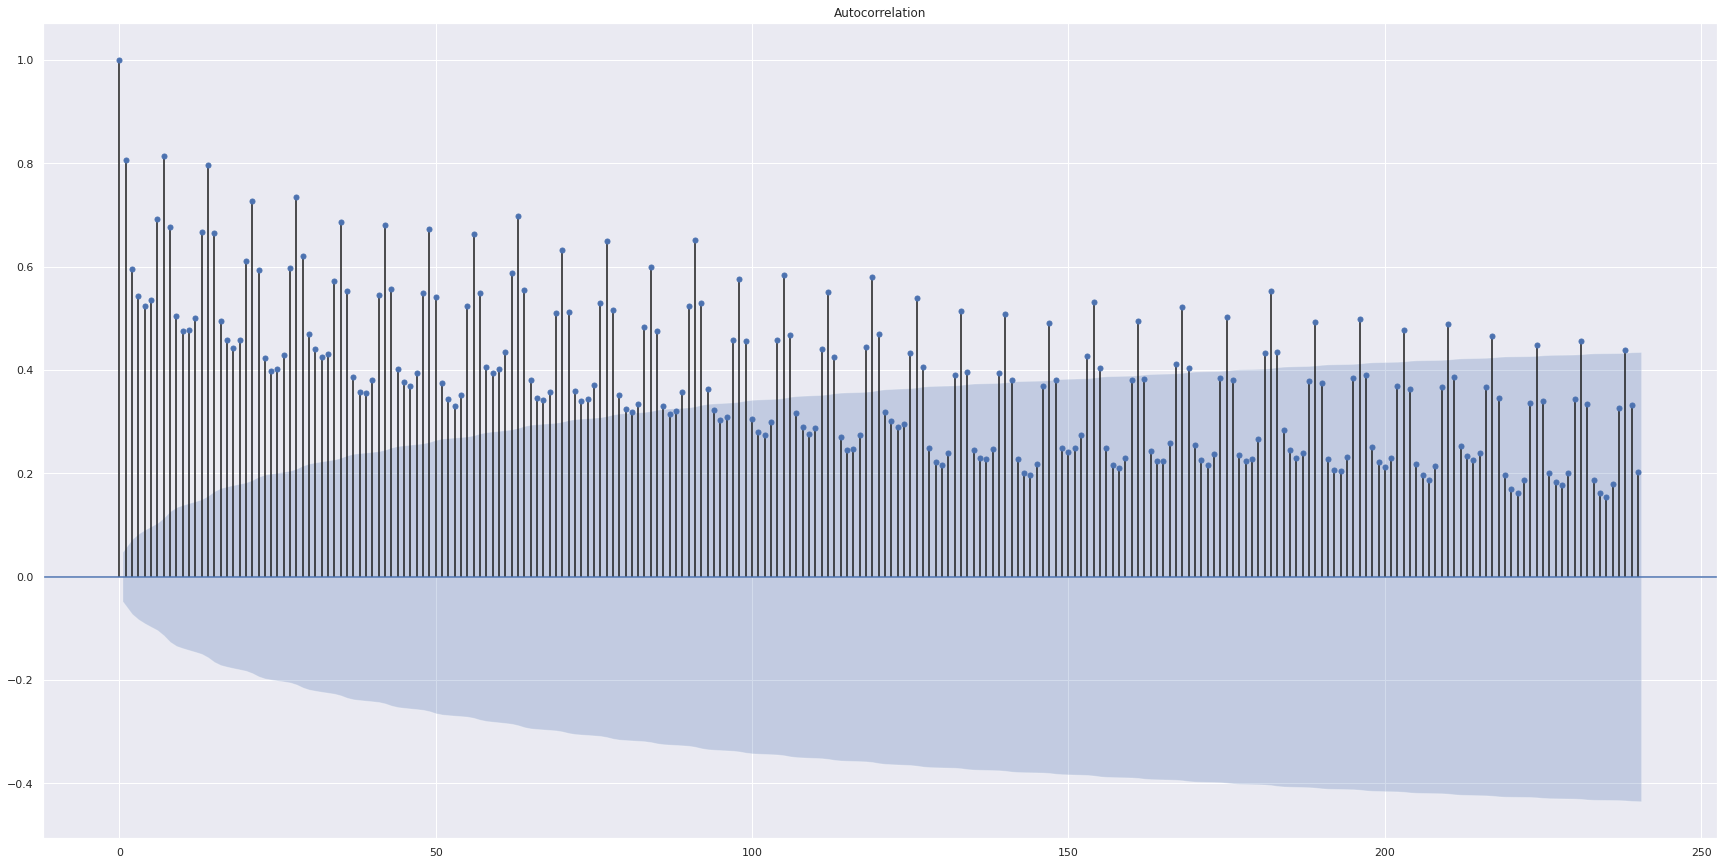

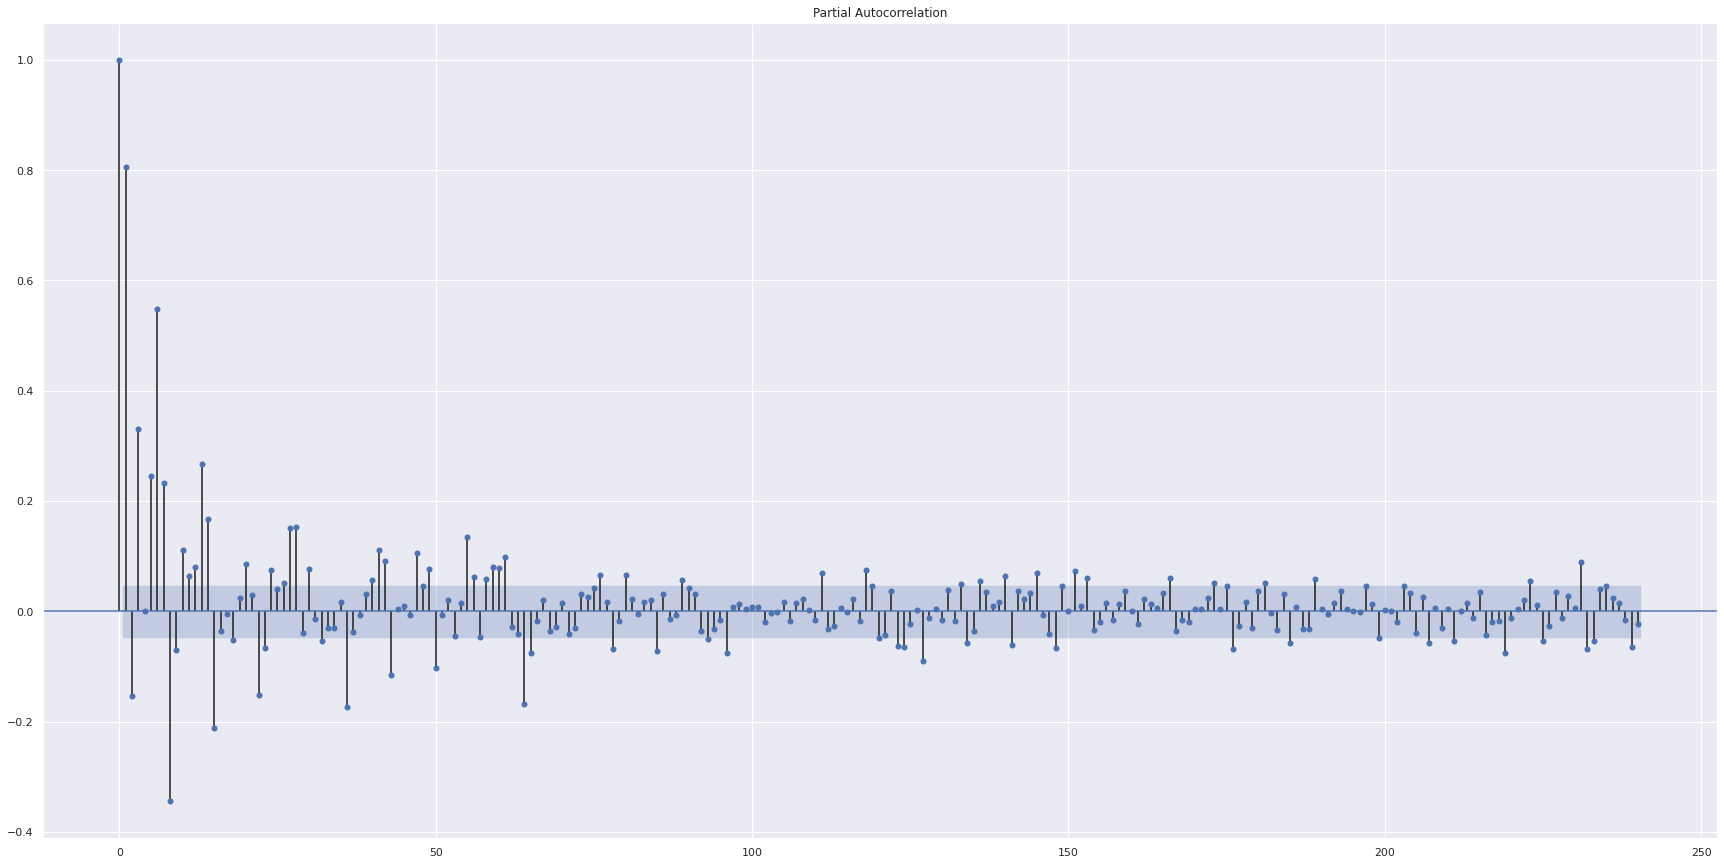

In [57]:
plot_acf(x=v,lags=240)
plot_pacf(x=v,lags=240)
plt.show()

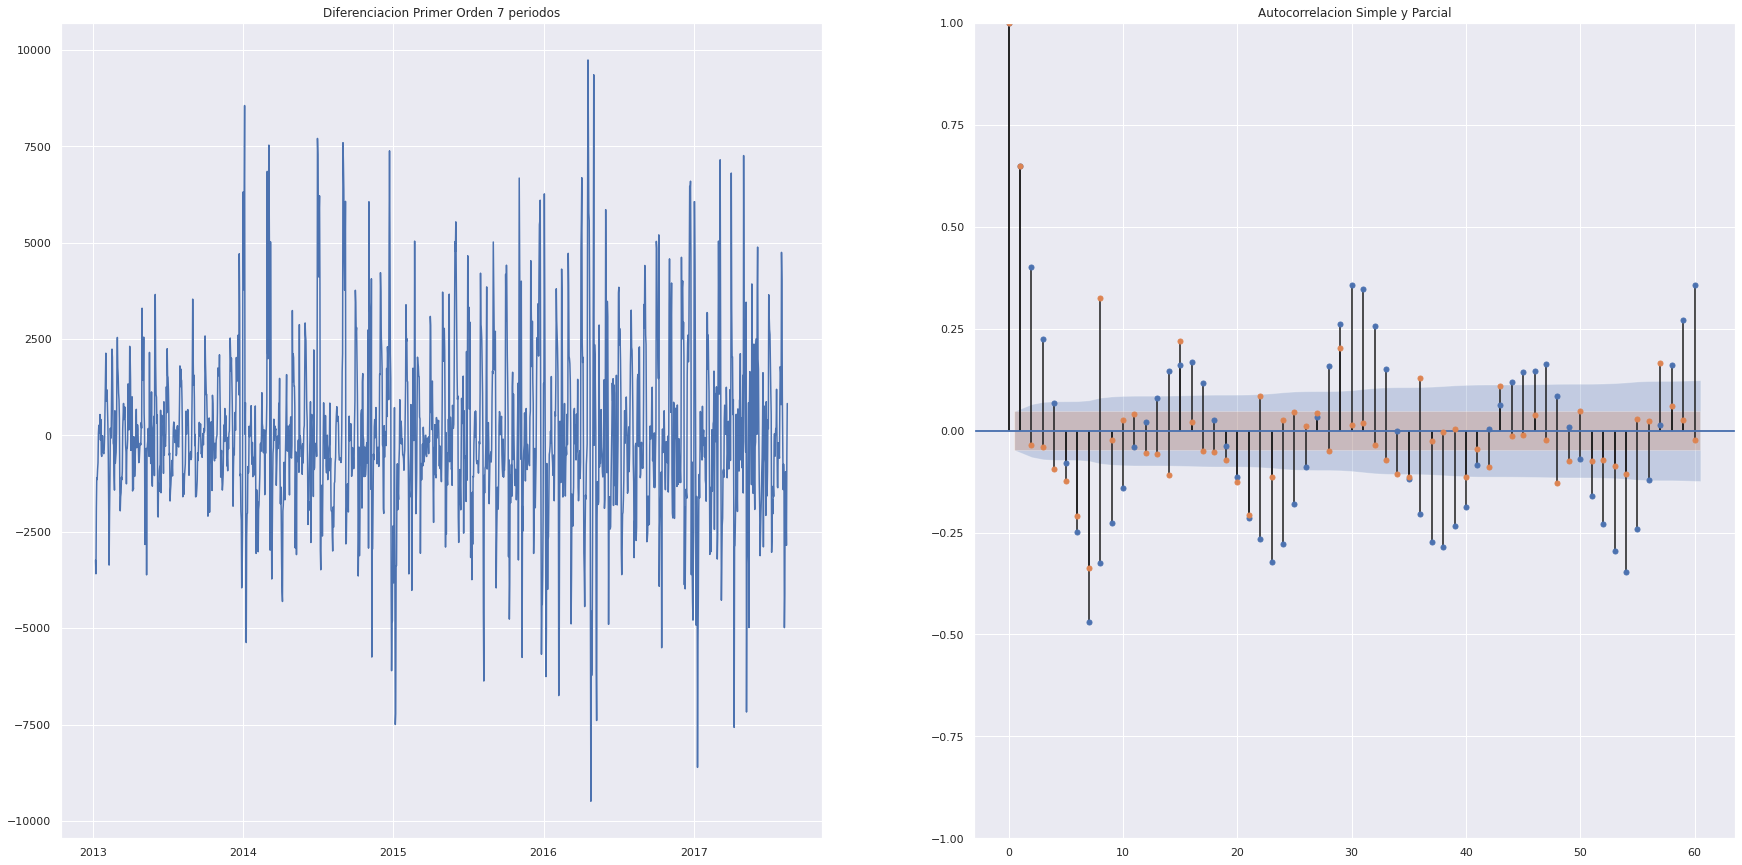

In [58]:
fig, axes= plt.subplots(1,2, sharex=False)
axes[0].plot(v.diff(7)); axes[0].set_title('Diferenciacion Primer Orden 7 periodos')
axes[1].set(ylim=(-1,1))
plot_acf(v.diff(7).dropna(), ax=axes[1], lags=60)
plot_pacf(v.diff(7).dropna(), ax=axes[1], lags=60)
plt.title('Autocorrelacion Simple y Parcial')


plt.show()

La diferenciación de primer orden pero tomando 7 periodos además de "aplanar" la tendencia creciente de los datos y hacer tender la media a cero, también hace converger más rápidamente las funciones de autocorrelación.

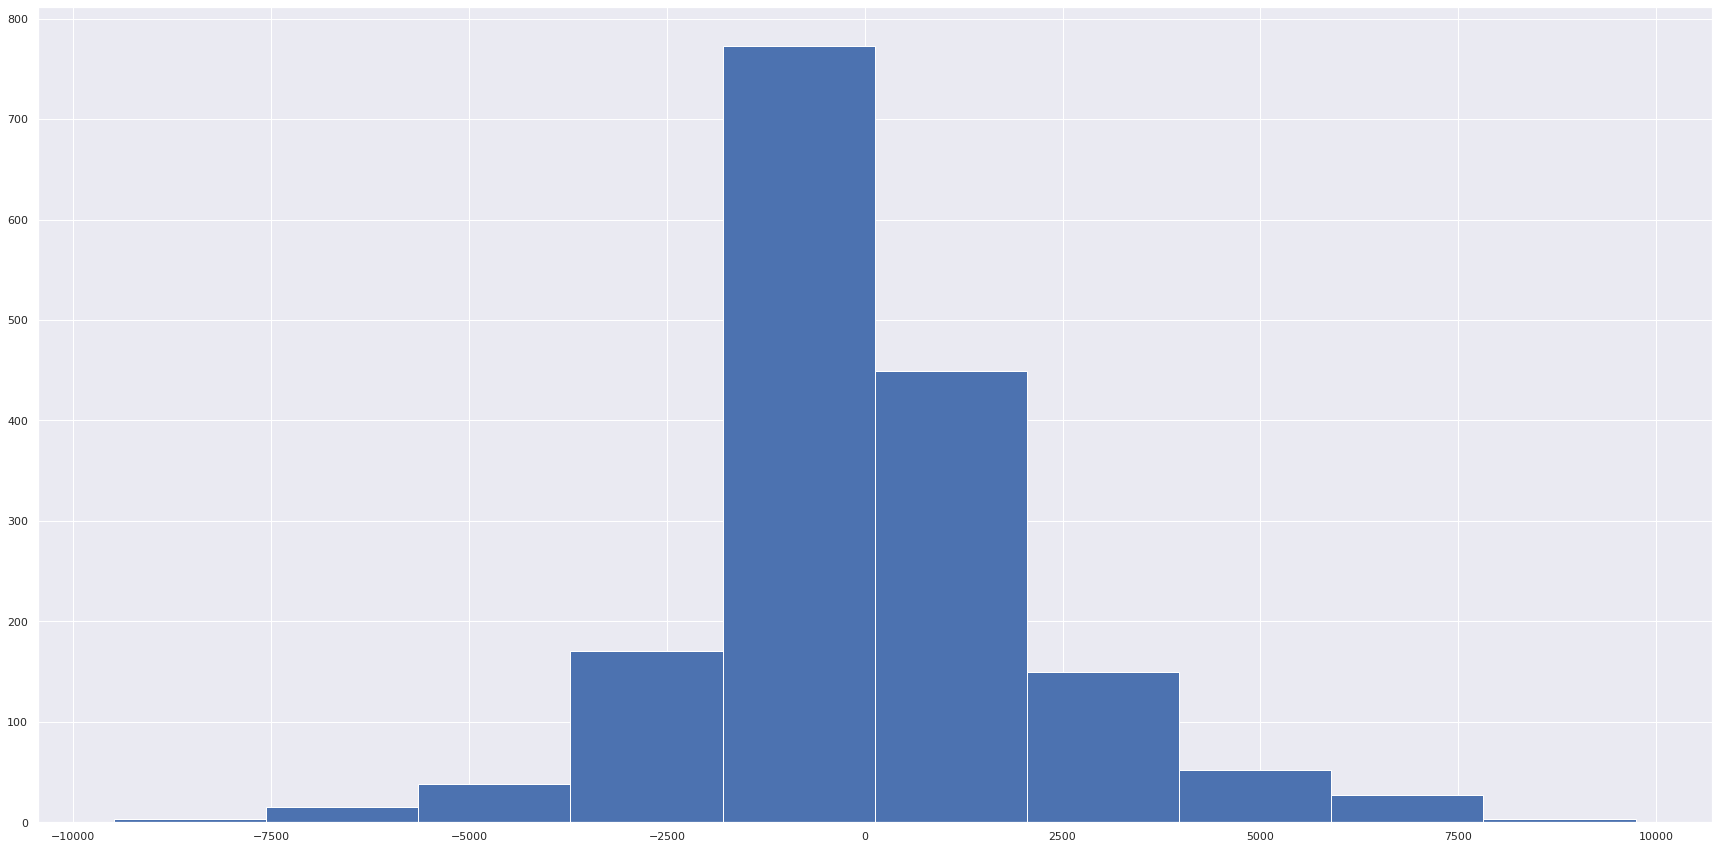

In [59]:
v.diff(7).hist()
plt.show()

Los histogramas para la variable diferenciada con lag 7, presentan además distribución normal, con leves asimetrias.